<a href="https://colab.research.google.com/github/annaleda/Pytorch_CNN/blob/main/Profilo_orario_esogene_confronto_settimanale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.metrics import mean_absolute_error

# Caricamento dei dati
db_user = 'timescale'
db_password = '7qWCJhnIGAjZEbqB'
db_host = '188.245.188.140'
db_name = 'timescale'
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}')
query = """
SELECT timestamp, plant_id, flow, temperature_celsius, humidity_percentage, wind_speed_ms, precipitation_mm
FROM dataset_raw
"""
df = pd.read_sql(query, engine)

# Filtrare solo le colonne esogene, ma includere anche 'plant_id' per la pivot
cols_esogene = ['temperature_celsius', 'humidity_percentage', 'wind_speed_ms', 'precipitation_mm']
df_exogenous = df[['timestamp', 'plant_id'] + cols_esogene]

# Impostare 'timestamp' come indice (per trattarlo come serie temporale)
df_exogenous.set_index('timestamp', inplace=True)

# **Rimuovere il fuso orario (se presente) e gestire eventuali duplicati nei timestamp**
df_exogenous.index = pd.to_datetime(df_exogenous.index).tz_localize(None)

# Rimuovere eventuali duplicati nel timestamp
df_exogenous = df_exogenous.loc[~df_exogenous.index.duplicated(keep='first')]

# Visualizzare i NaN
print("NaN nel DataFrame iniziale:")
print(df_exogenous.isna().sum())

# Pivot dei dati per avere 'timestamp' come indice e 'plant_id' come colonne
# Ora 'plant_id' è incluso nel DataFrame
plot_df = pd.pivot_table(df_exogenous, index="timestamp", columns="plant_id", values=cols_esogene)

# Resample the DataFrame to hourly frequency to ensure all hours are present
plot_df = plot_df.resample("H").asfreq()



NaN nel DataFrame iniziale:
plant_id               0
temperature_celsius    0
humidity_percentage    0
wind_speed_ms          0
precipitation_mm       0
dtype: int64


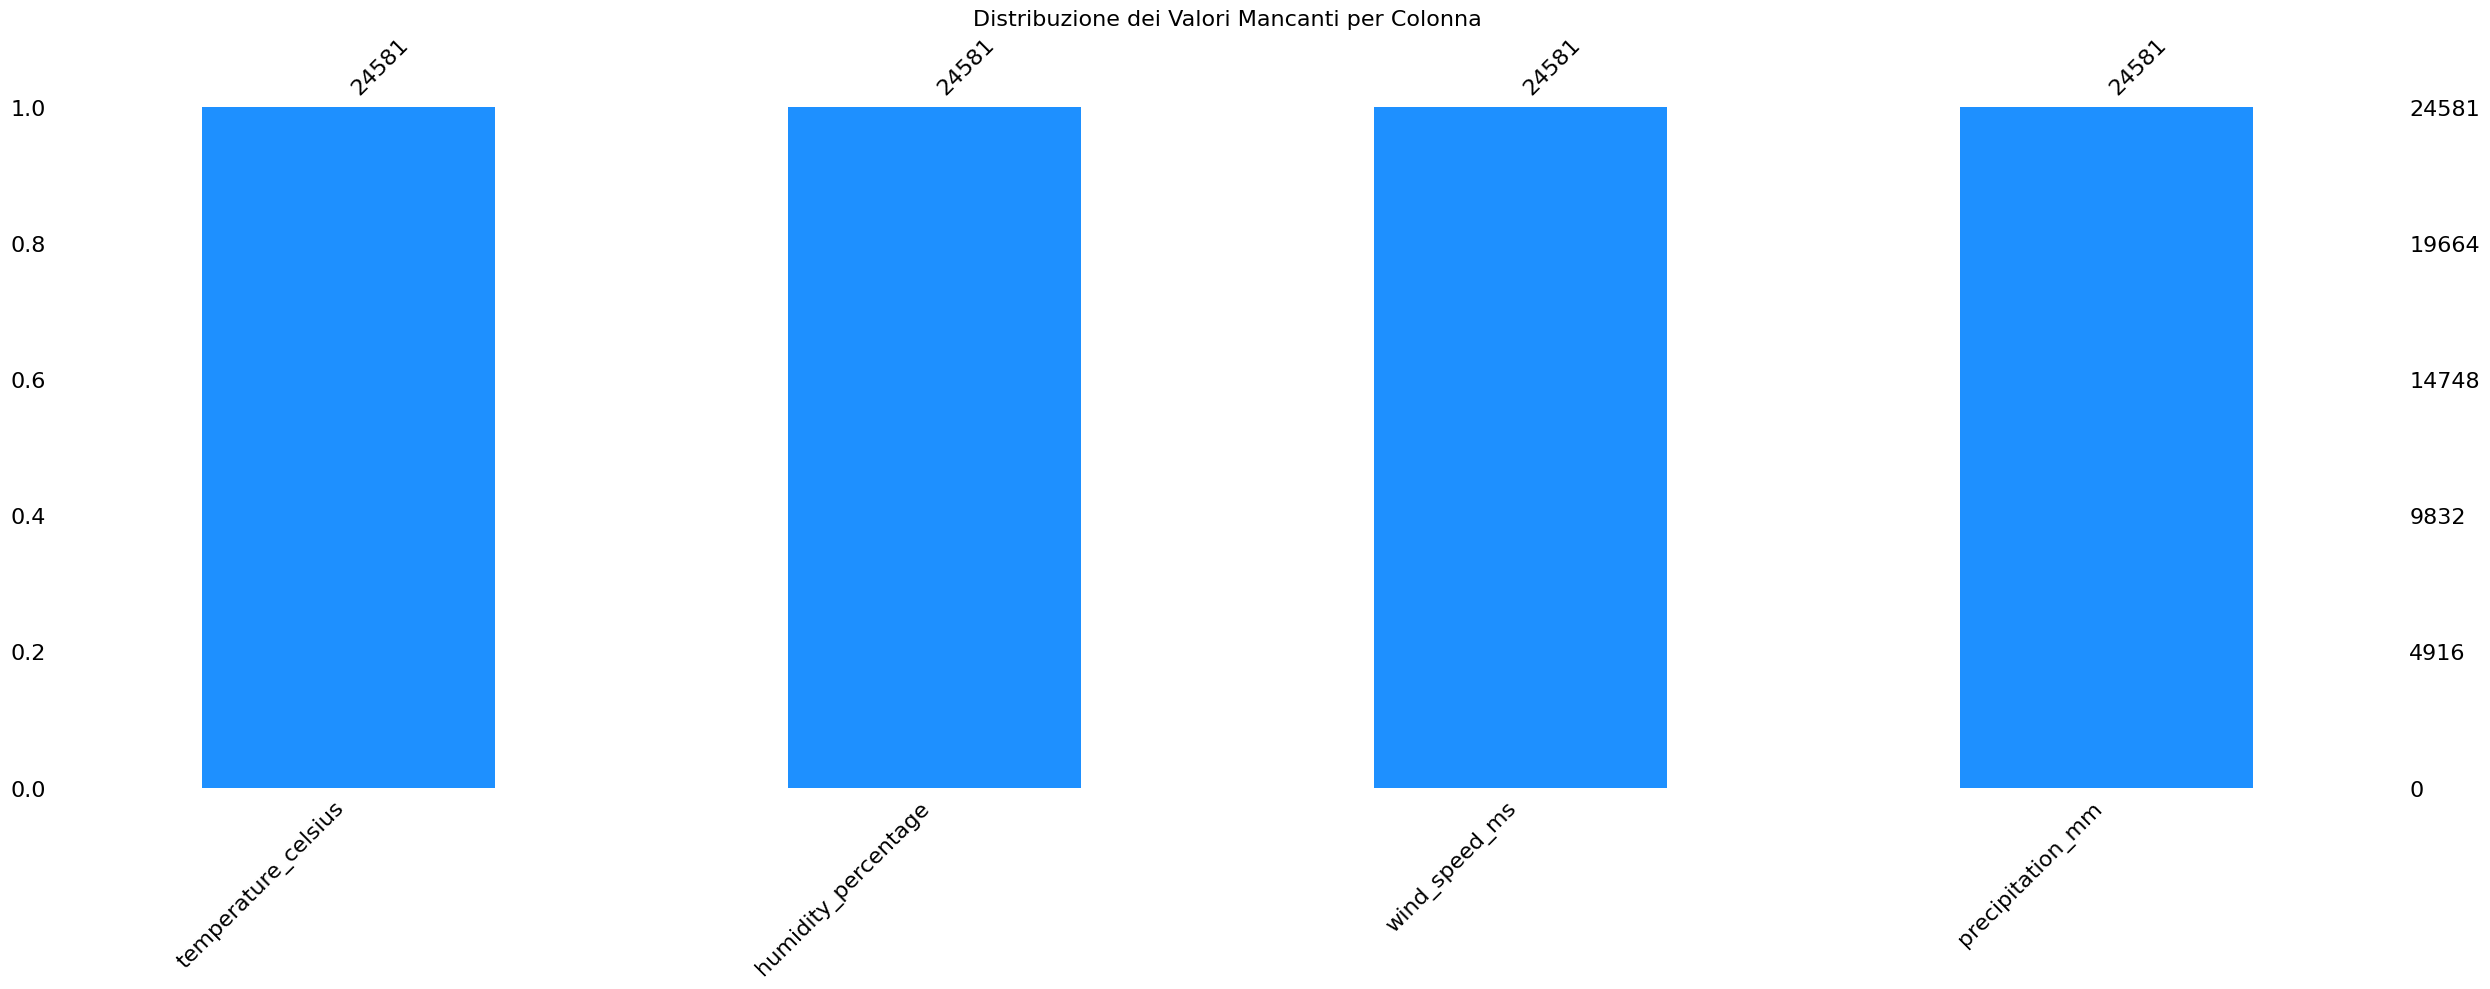

In [51]:
# Rimuoviamo la colonna 'plant_id'
df_exogenous_cleaned = df_exogenous.drop(columns=['plant_id'])

# Grafico a barre dei valori mancanti
plt.figure(figsize=(12, 6))
msno.bar(df_exogenous_cleaned, color='dodgerblue')  # Colore personalizzato per le barre
plt.title("Distribuzione dei Valori Mancanti per Colonna", fontsize=16)
plt.tight_layout()  # Ottimizza il layout
plt.show()

<Figure size 1200x600 with 0 Axes>

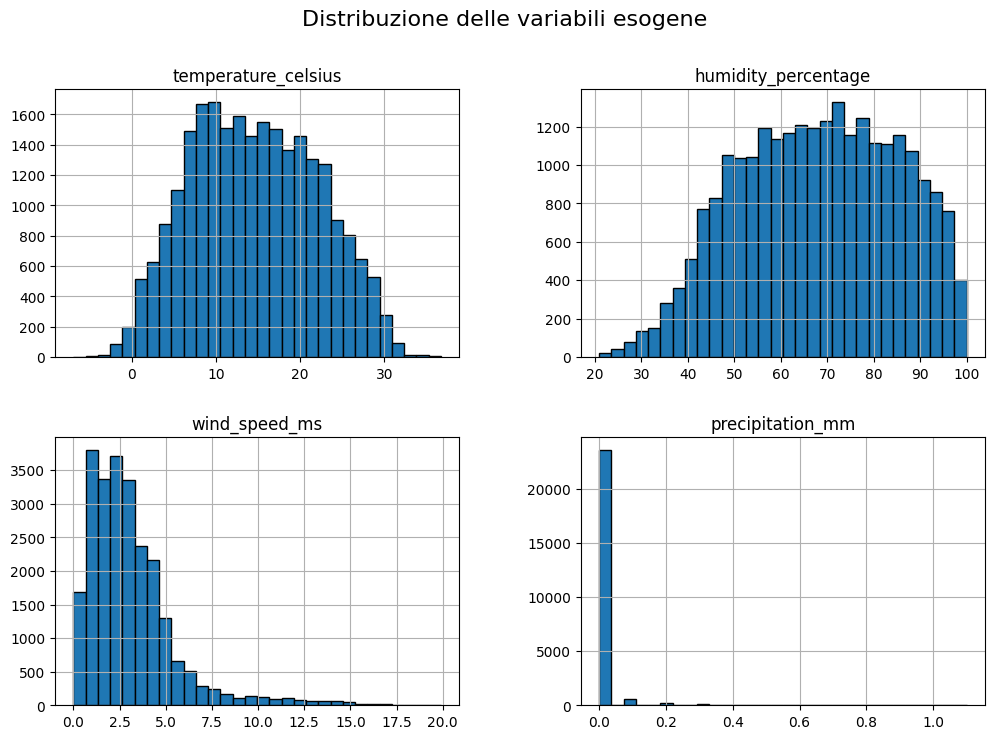

In [33]:
# **Grafico 2: Distribuzione delle variabili esogene**
plt.figure(figsize=(12, 6))
df_exogenous[cols_esogene].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle("Distribuzione delle variabili esogene", fontsize=16)
plt.show()



<Figure size 1400x800 with 0 Axes>

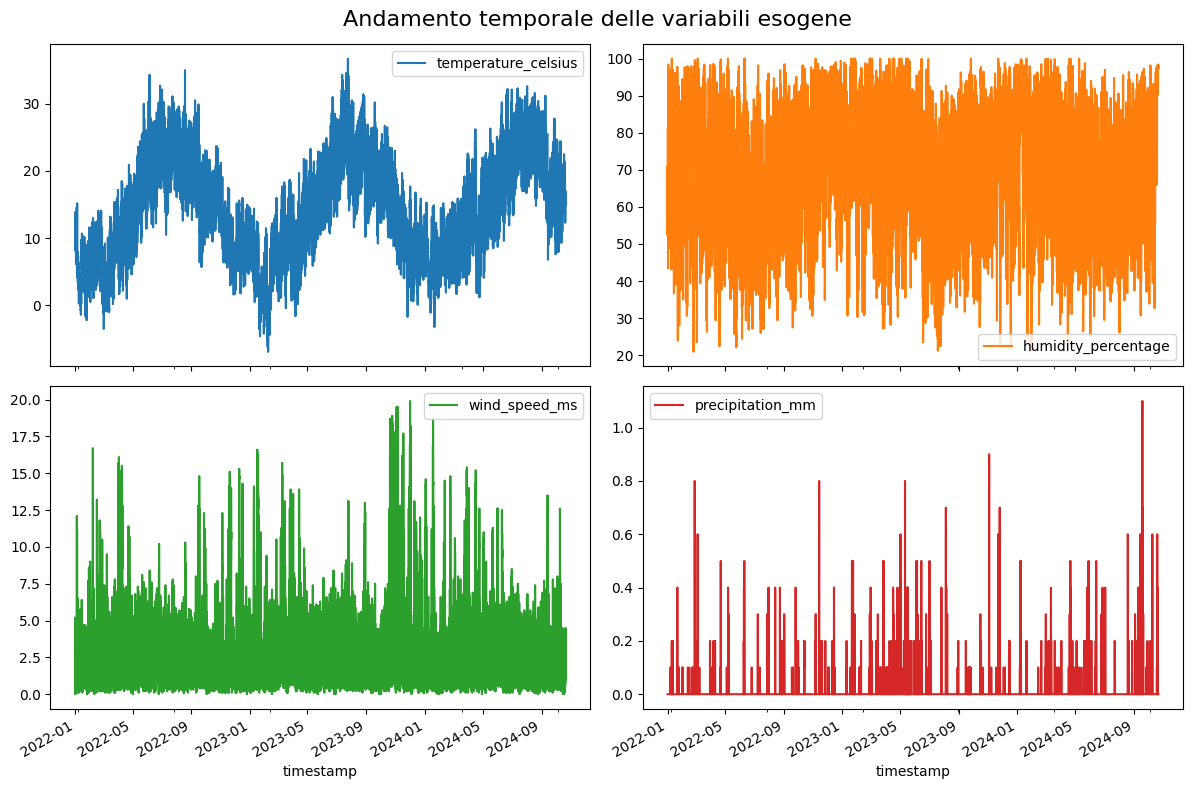

In [34]:
# **Grafico 3: Andamento temporale delle variabili esogene**
plt.figure(figsize=(14, 8))
df_exogenous[cols_esogene].plot(subplots=True, layout=(2, 2), figsize=(12, 8), sharex=True)
plt.suptitle("Andamento temporale delle variabili esogene", fontsize=16)
plt.tight_layout()
plt.show()



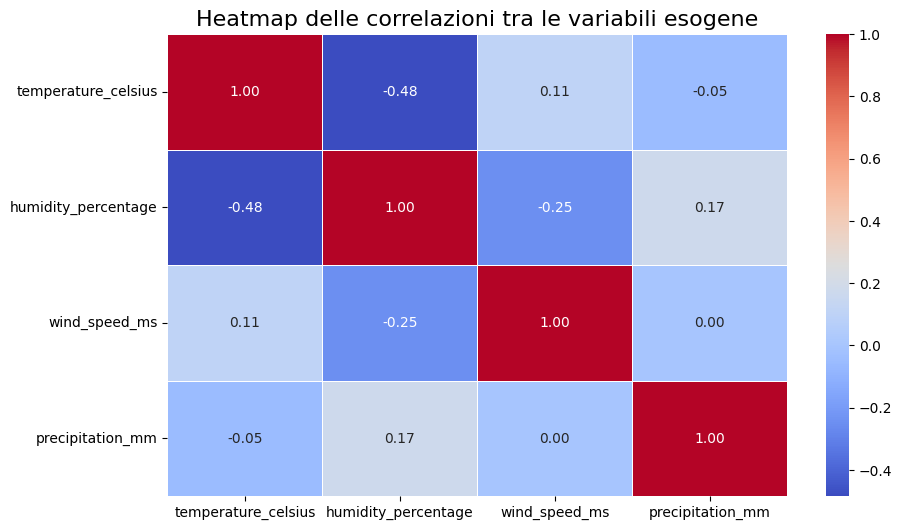

In [35]:
# **Grafico 4: Heatmap delle correlazioni**
plt.figure(figsize=(10, 6))
corr_matrix = df_exogenous[cols_esogene].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap delle correlazioni tra le variabili esogene", fontsize=16)
plt.show()



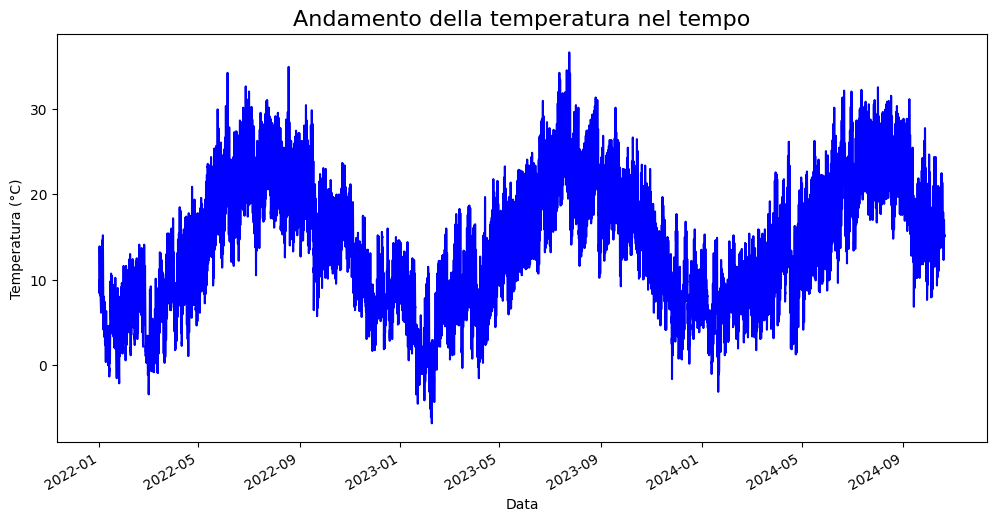

In [36]:
# **Grafico 5: Serie temporale per una variabile specifica**
# (e.g., temperature_celsius)
plt.figure(figsize=(12, 6))
df_exogenous['temperature_celsius'].plot(figsize=(12, 6), color='b')
plt.title("Andamento della temperatura nel tempo", fontsize=16)
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.show()



Elaborazione per IMPIANTO 1...
MAE Media Mobile per IMPIANTO 1: 1.2271
MAE Profilo Orario per IMPIANTO 1: 0.0000


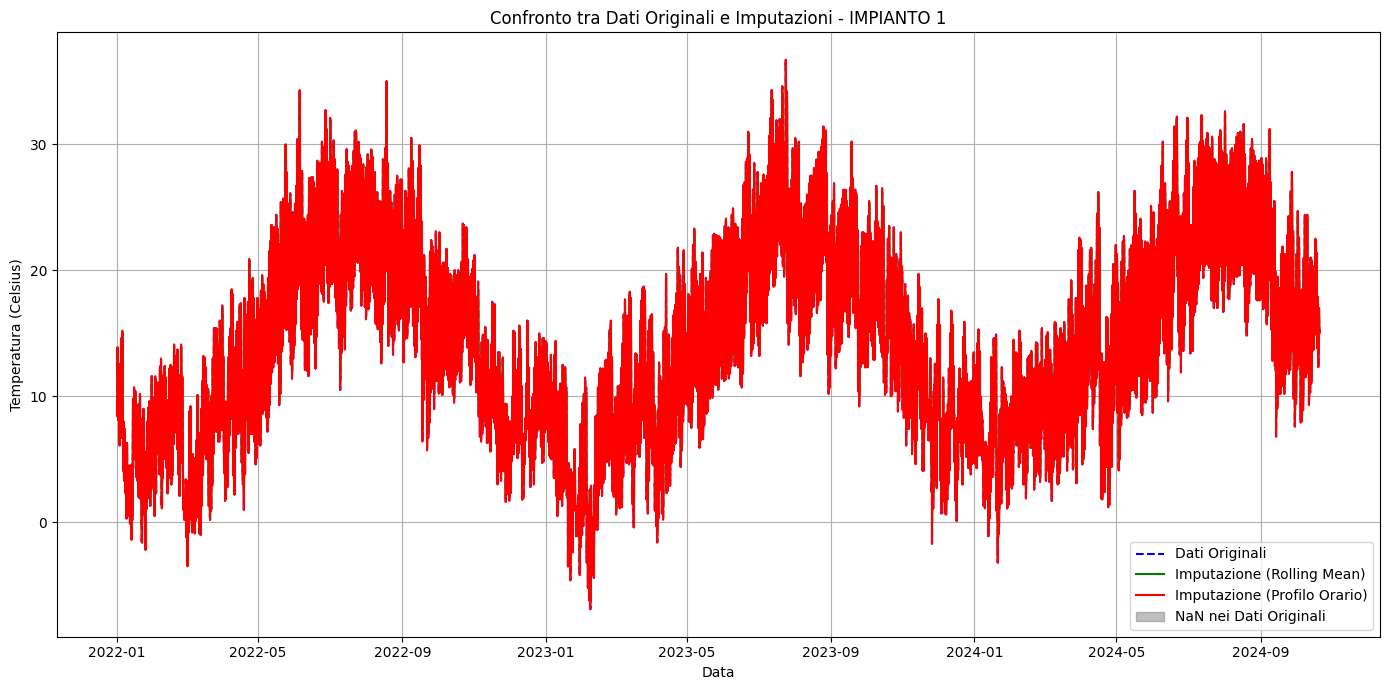

Elaborazione per IMPIANTO 2...
MAE Media Mobile per IMPIANTO 2: 1.3812
MAE Profilo Orario per IMPIANTO 2: 0.0000


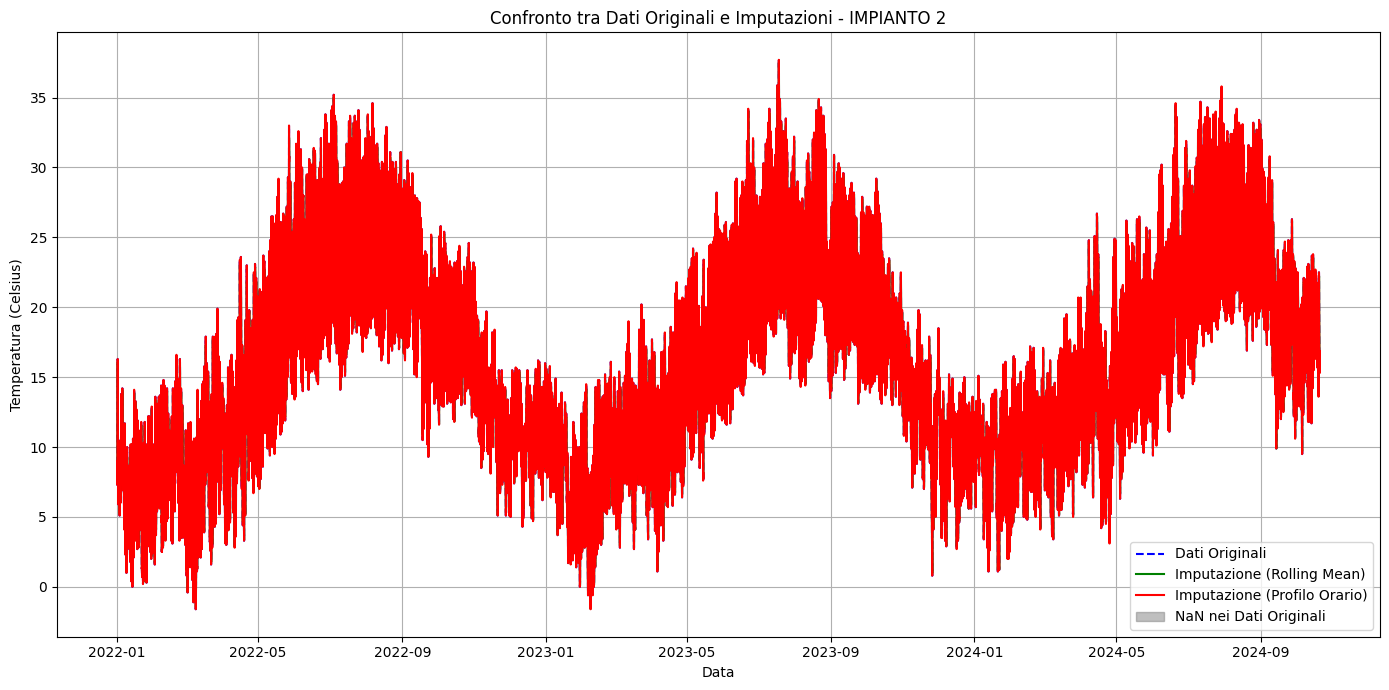

Elaborazione per IMPIANTO 3...
MAE Media Mobile per IMPIANTO 3: 1.3004
MAE Profilo Orario per IMPIANTO 3: 0.0000


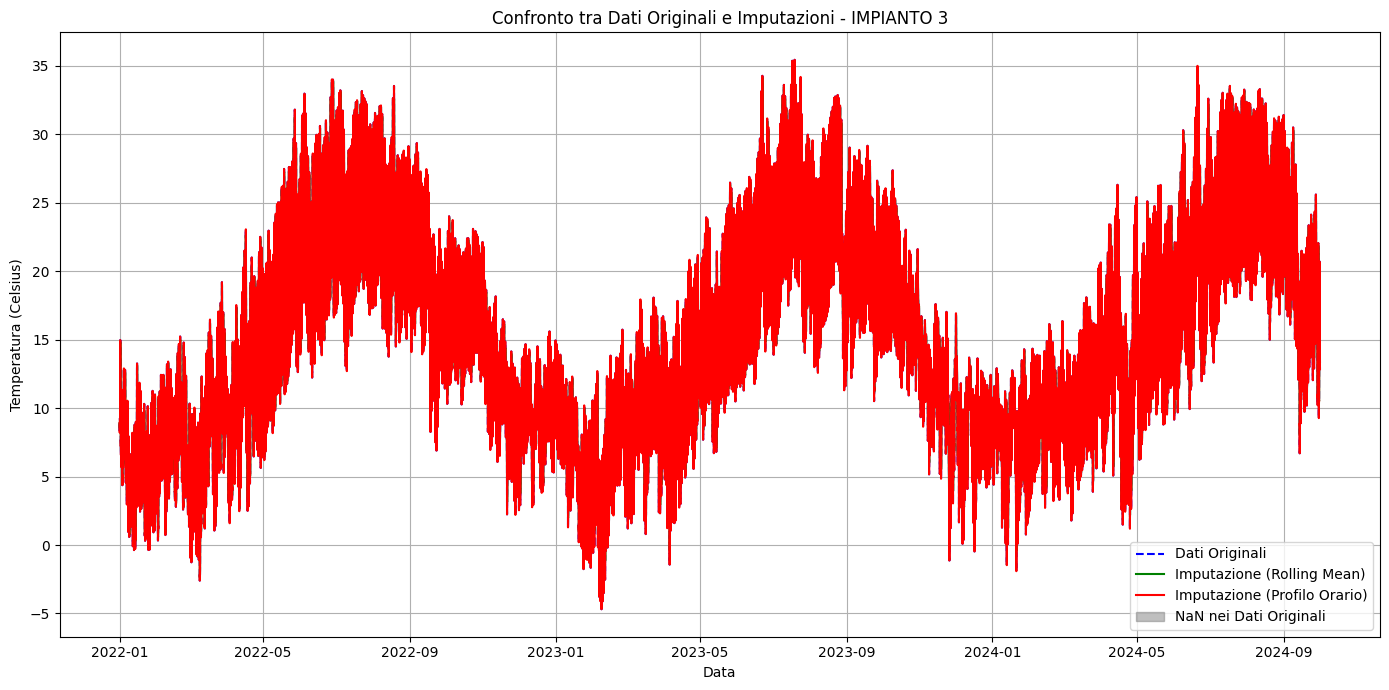

Elaborazione per IMPIANTO 4...
MAE Media Mobile per IMPIANTO 4: 1.1408
MAE Profilo Orario per IMPIANTO 4: 0.0000


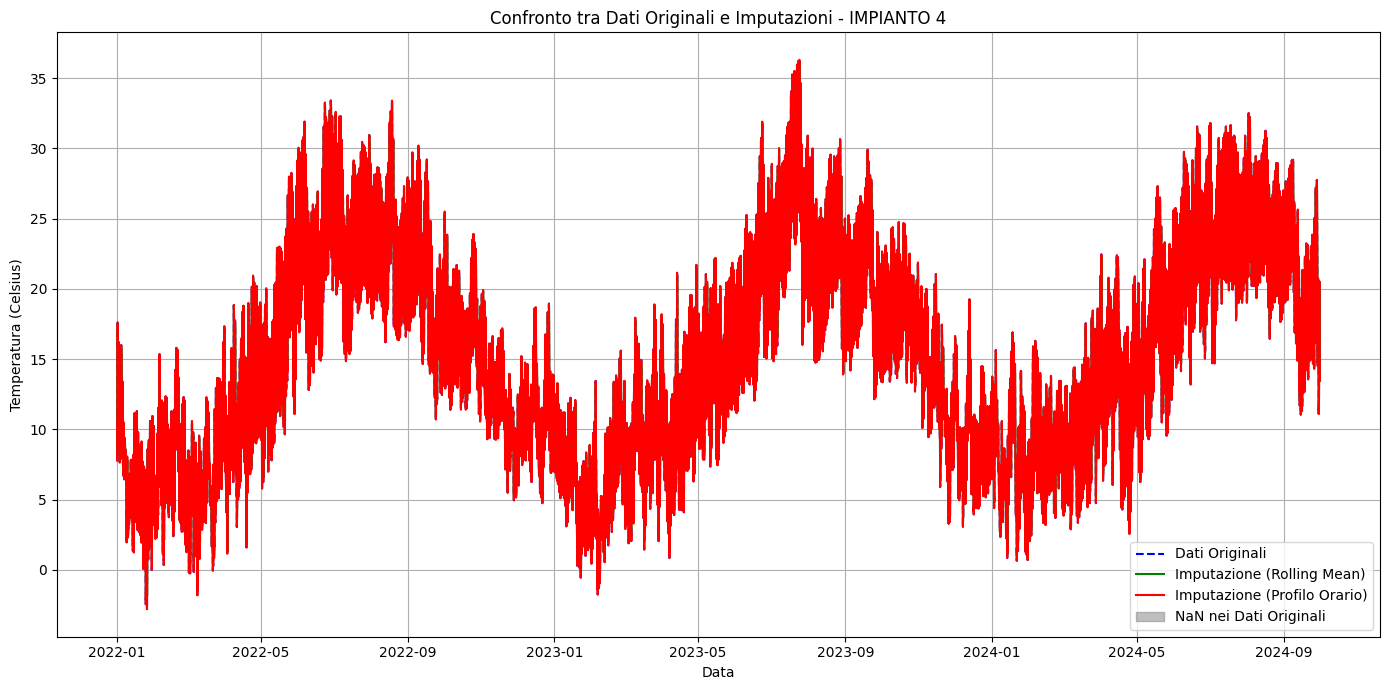

Elaborazione per IMPIANTO 5...
MAE Media Mobile per IMPIANTO 5: 1.3366
MAE Profilo Orario per IMPIANTO 5: 0.0000


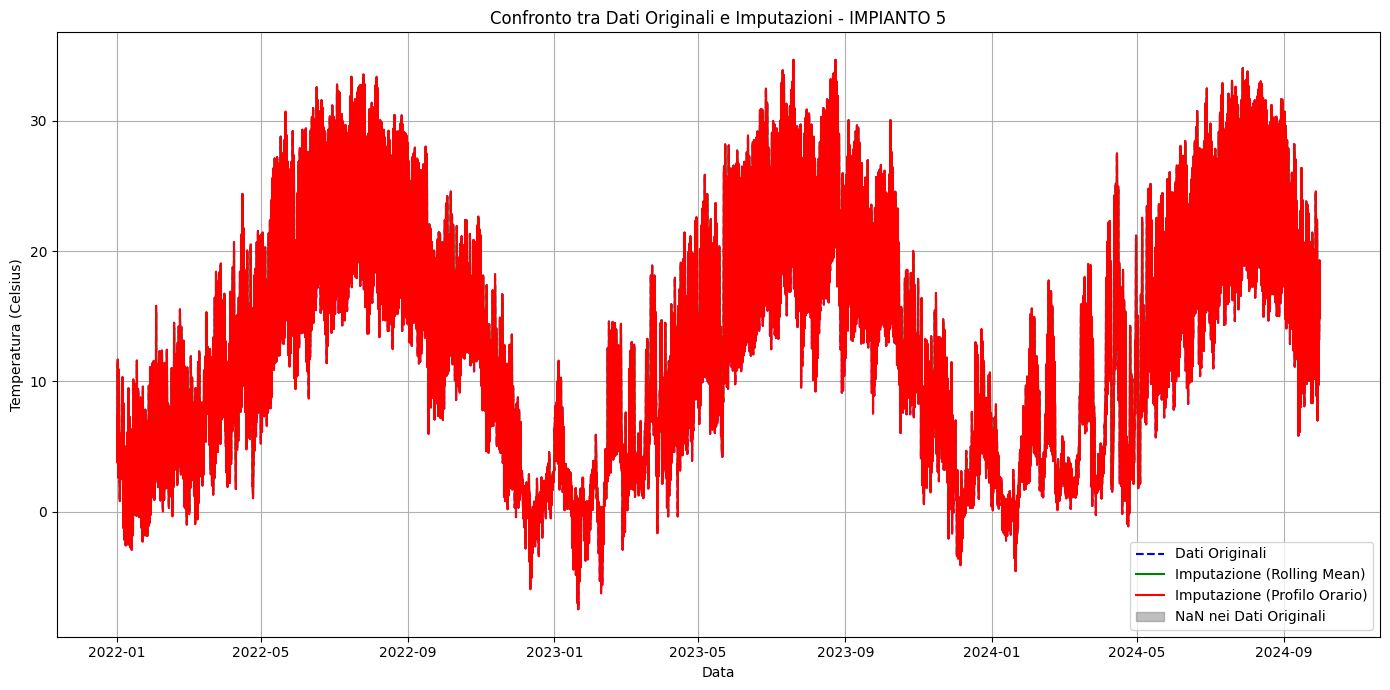

Elaborazione per IMPIANTO 6...
MAE Media Mobile per IMPIANTO 6: 1.3604
MAE Profilo Orario per IMPIANTO 6: 0.0000


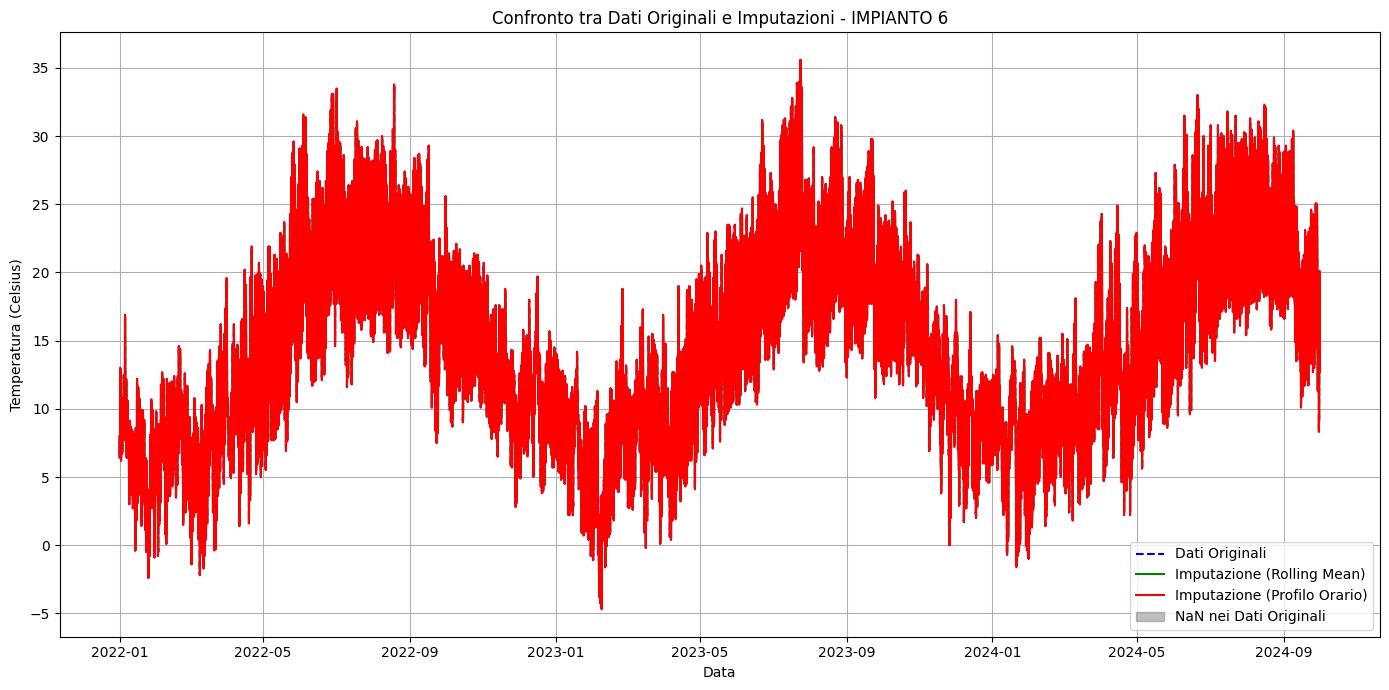

Elaborazione per IMPIANTO 7...
MAE Media Mobile per IMPIANTO 7: 1.3230
MAE Profilo Orario per IMPIANTO 7: 0.0000


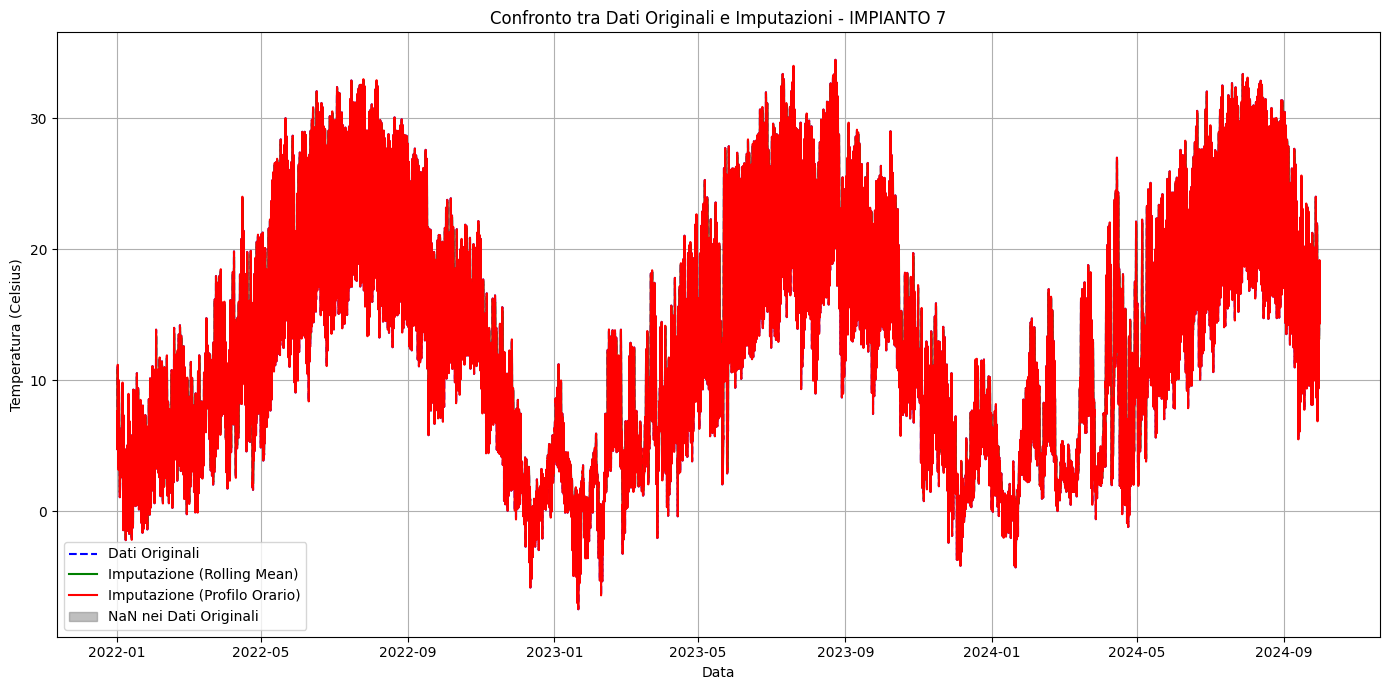

Elaborazione per IMPIANTO 8...
MAE Media Mobile per IMPIANTO 8: 1.1048
MAE Profilo Orario per IMPIANTO 8: 0.0000


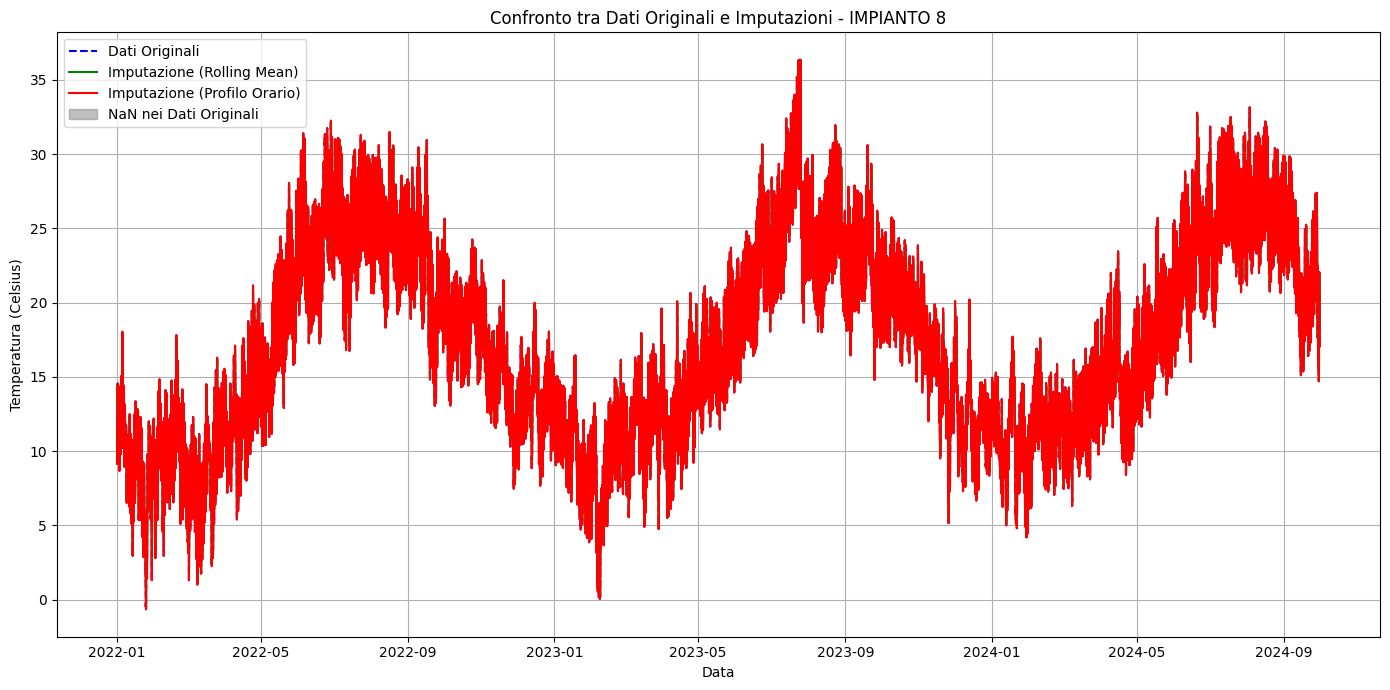

Elaborazione per IMPIANTO 9...
MAE Media Mobile per IMPIANTO 9: 1.1897
MAE Profilo Orario per IMPIANTO 9: 0.0000


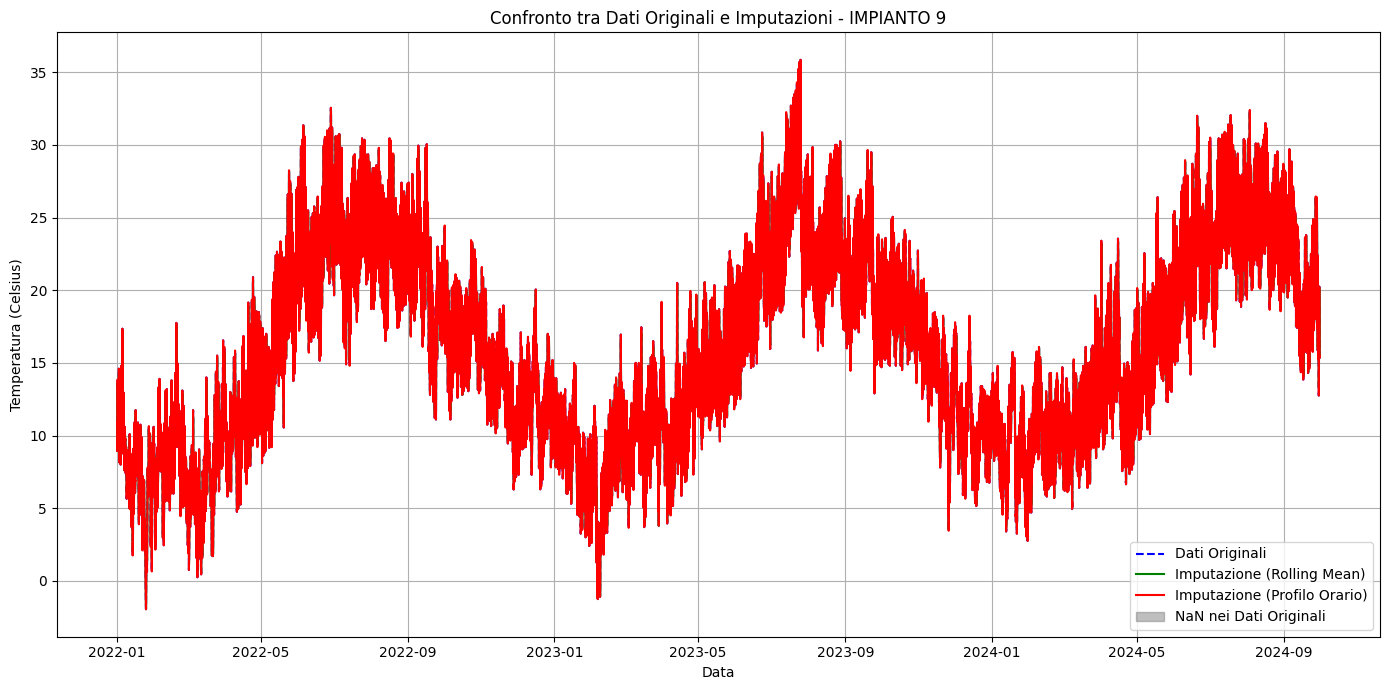

Elaborazione per IMPIANTO 10...
MAE Media Mobile per IMPIANTO 10: 0.8081
MAE Profilo Orario per IMPIANTO 10: 0.0000


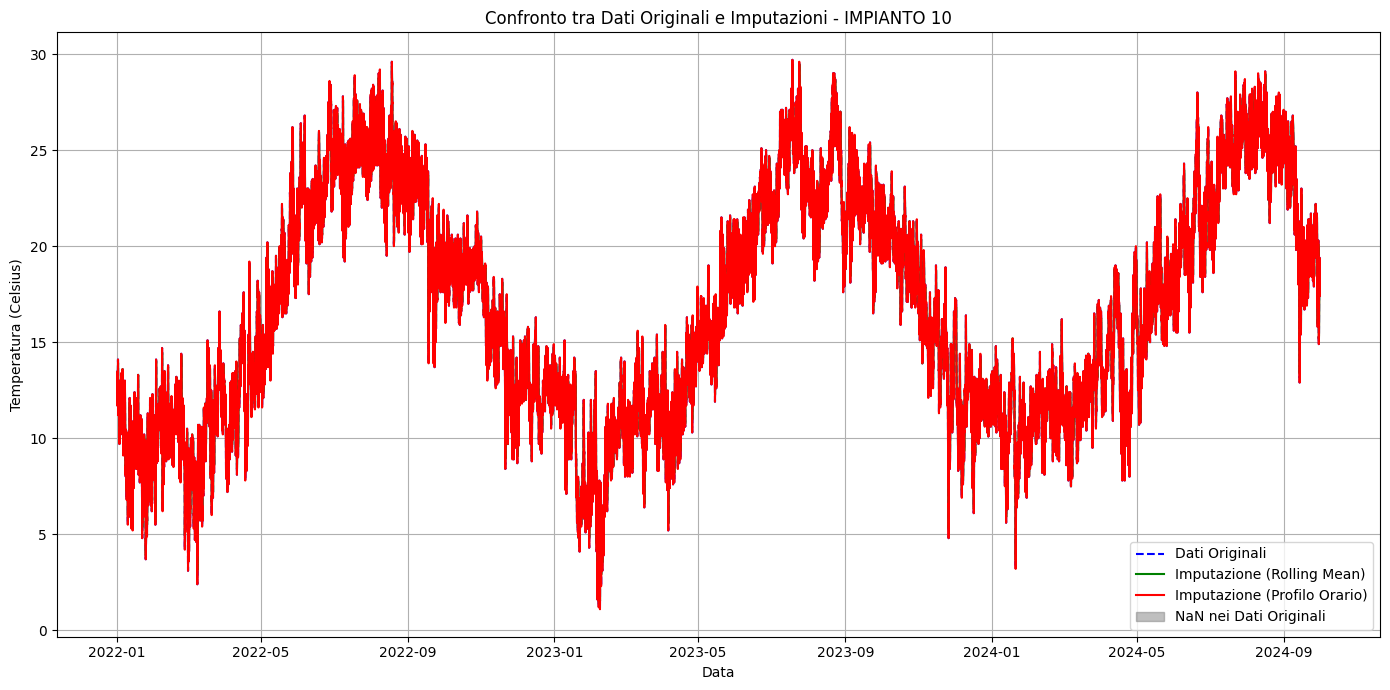

Elaborazione per IMPIANTO 11...
MAE Media Mobile per IMPIANTO 11: 0.9916
MAE Profilo Orario per IMPIANTO 11: 0.0000


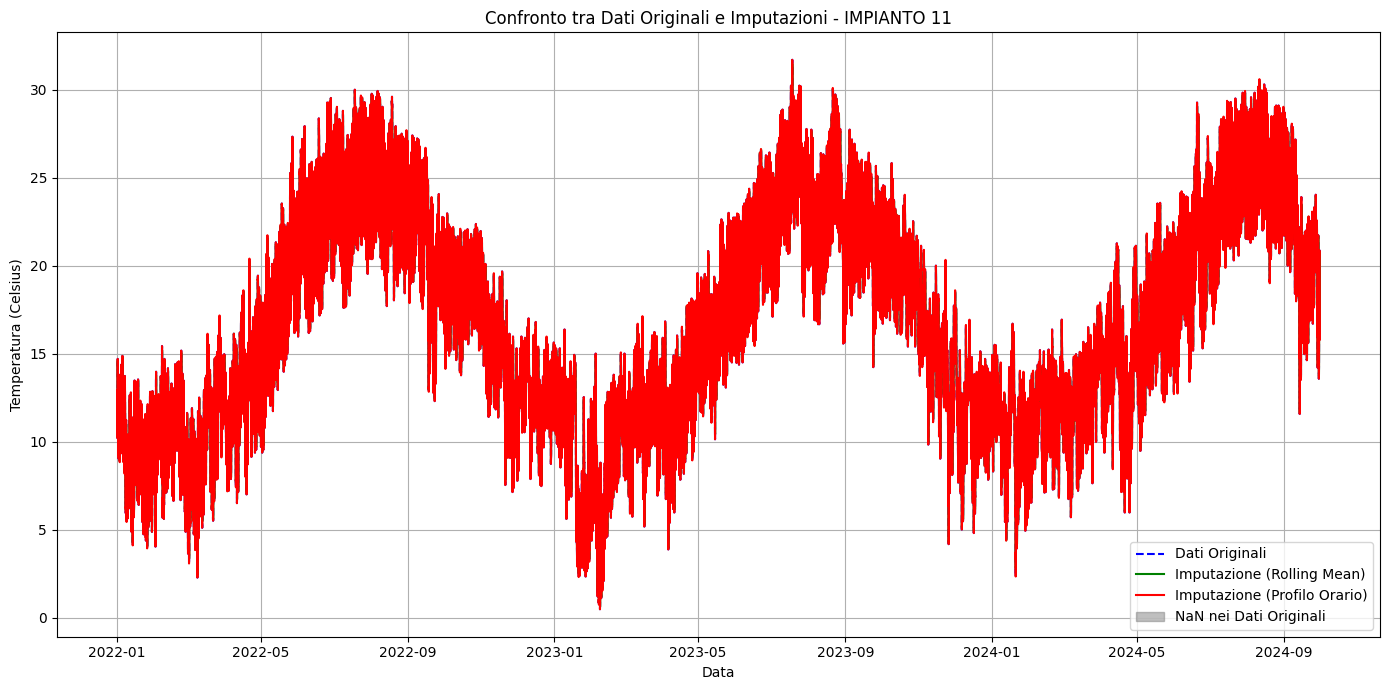

Elaborazione per IMPIANTO 12...
MAE Media Mobile per IMPIANTO 12: 1.2220
MAE Profilo Orario per IMPIANTO 12: 0.0000


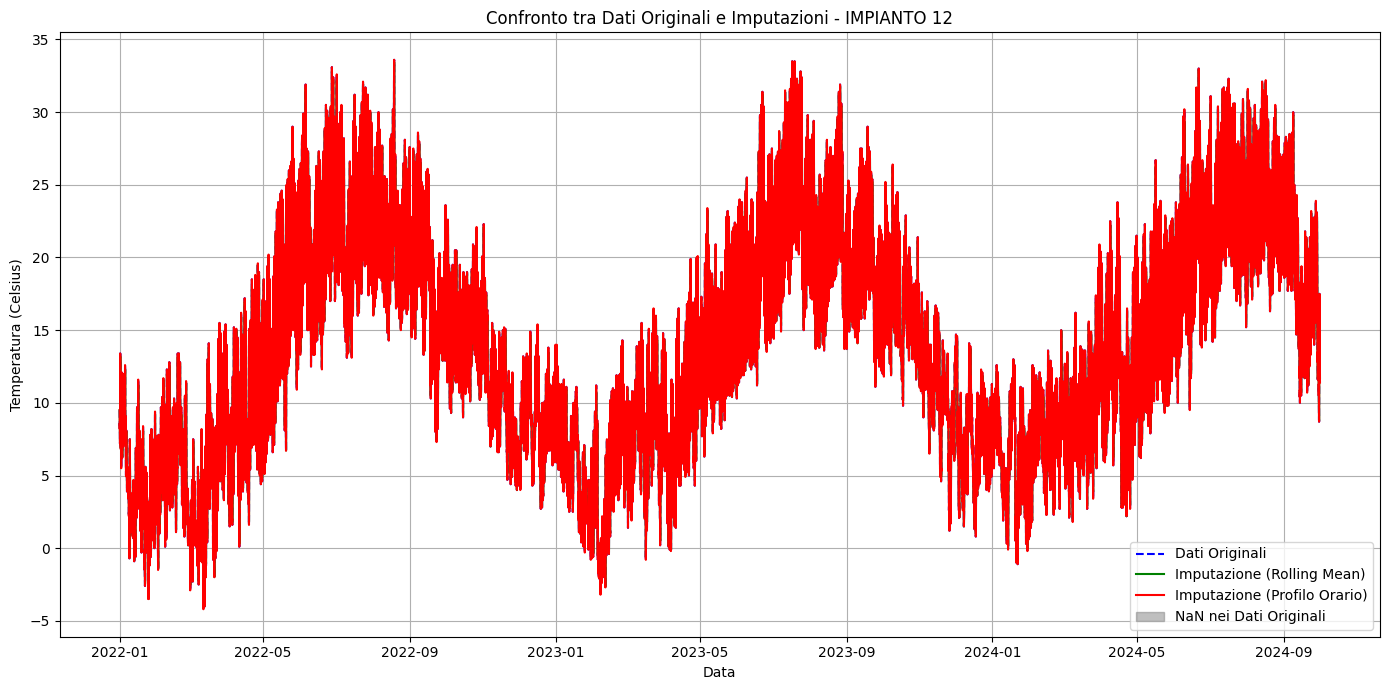

Elaborazione per IMPIANTO 13...
MAE Media Mobile per IMPIANTO 13: 1.2946
MAE Profilo Orario per IMPIANTO 13: 0.0000


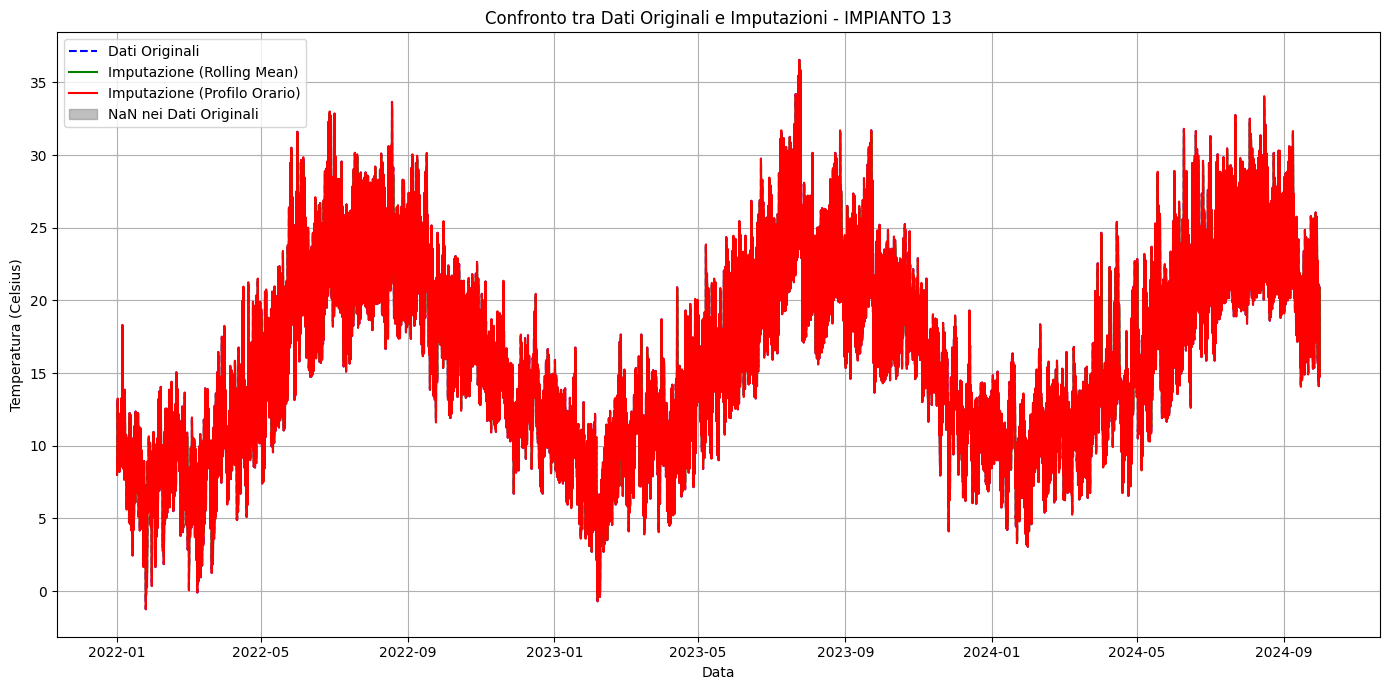

Elaborazione per IMPIANTO 14...
MAE Media Mobile per IMPIANTO 14: 1.0861
MAE Profilo Orario per IMPIANTO 14: 0.0000


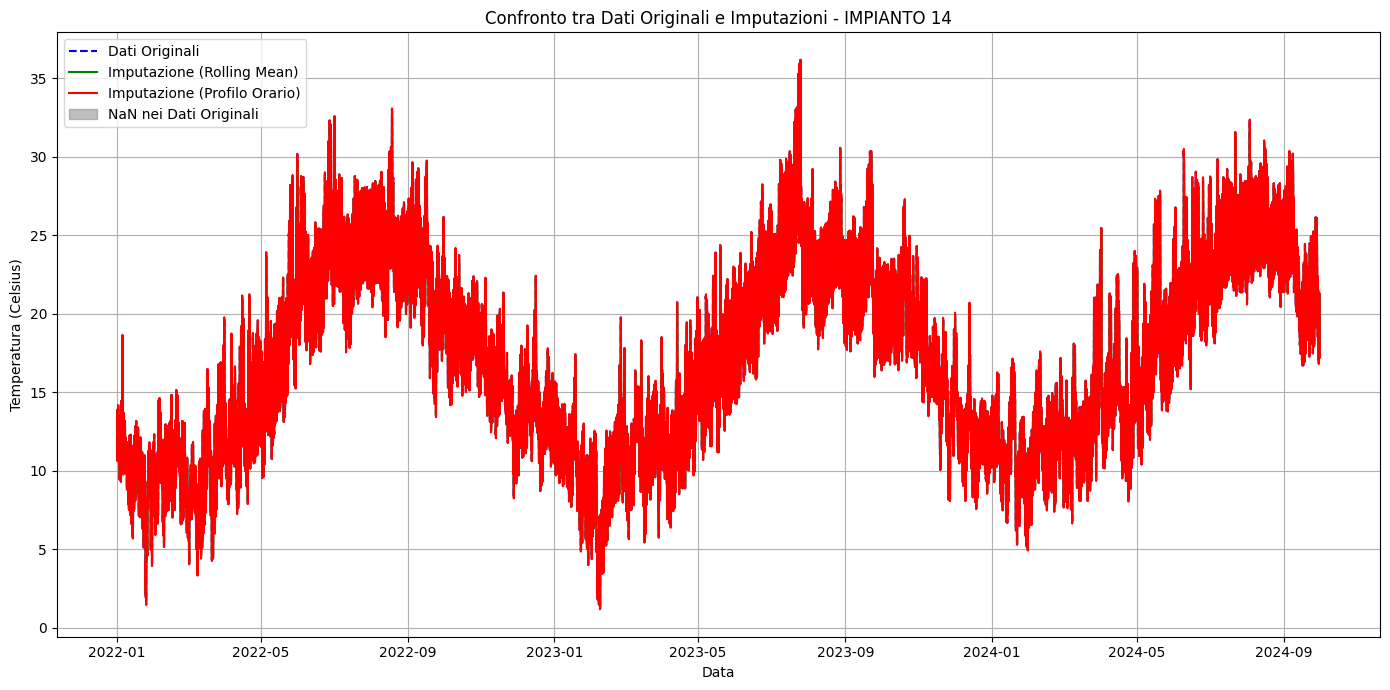

Elaborazione per IMPIANTO 15...
MAE Media Mobile per IMPIANTO 15: 1.2708
MAE Profilo Orario per IMPIANTO 15: 0.0000


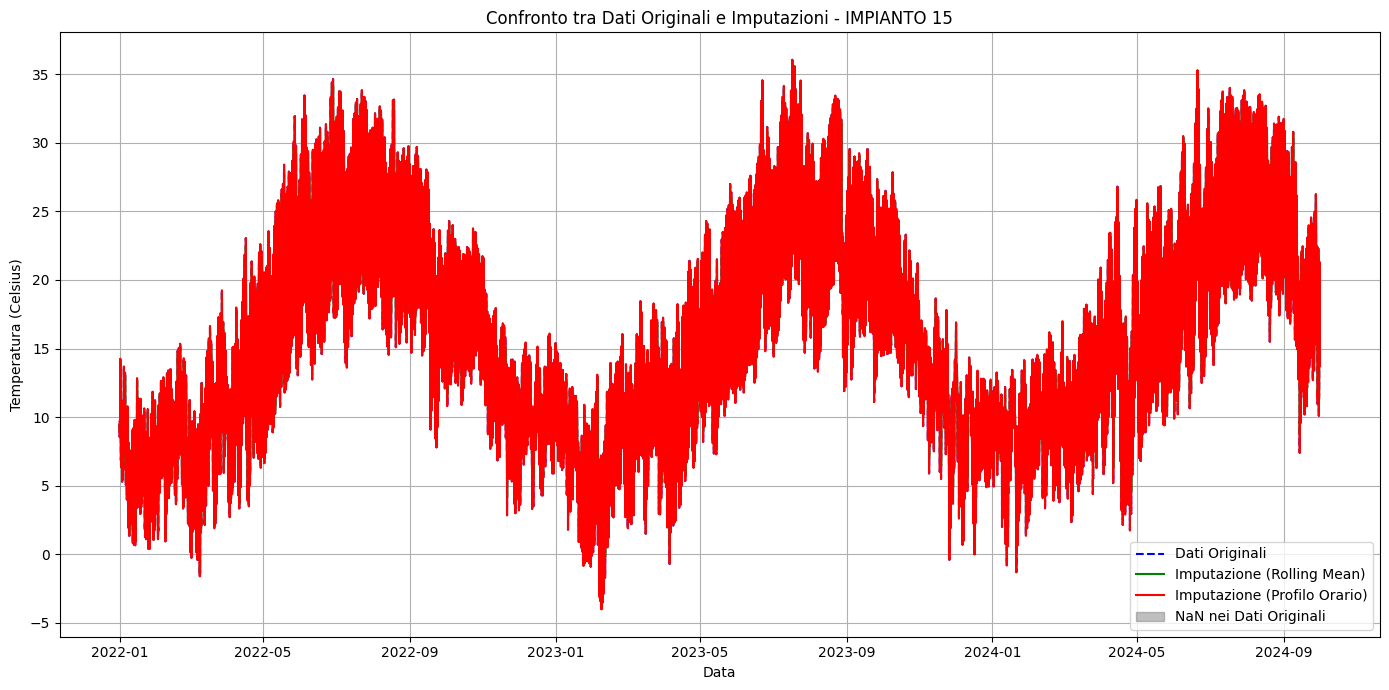

Elaborazione per IMPIANTO 16...
MAE Media Mobile per IMPIANTO 16: 1.2666
MAE Profilo Orario per IMPIANTO 16: 0.0000


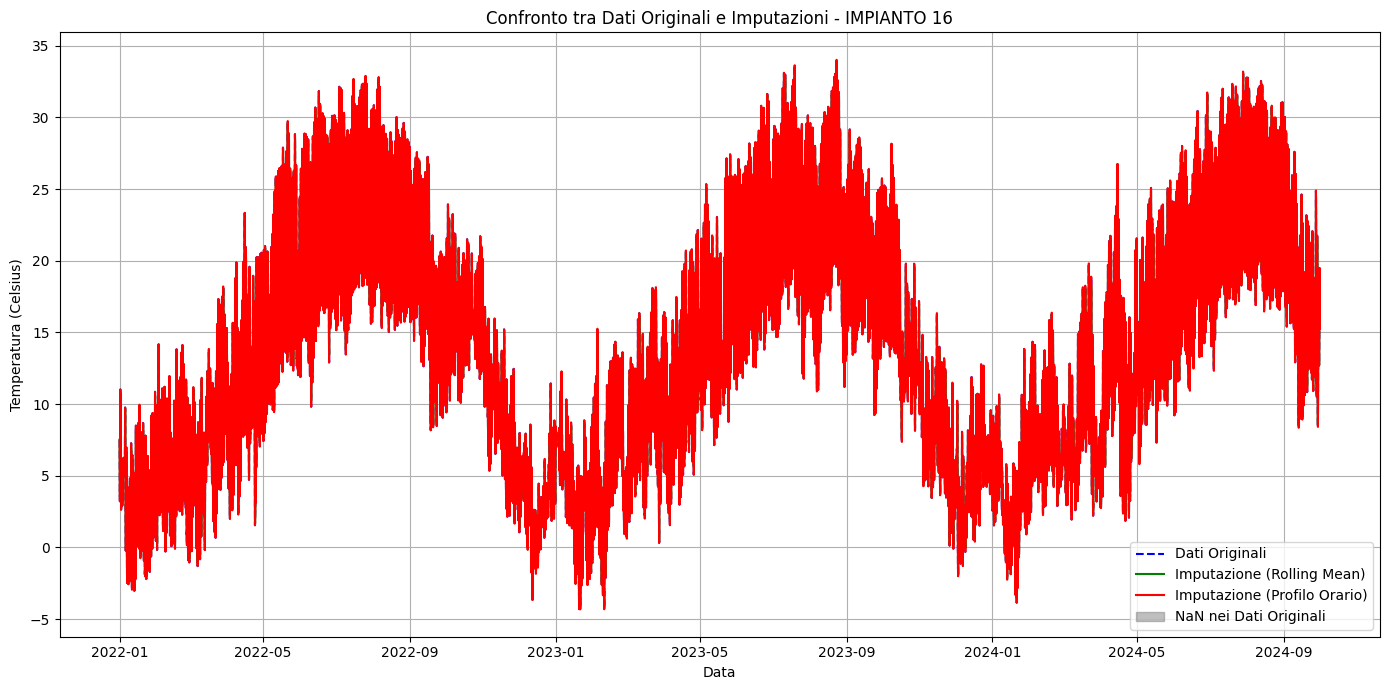

Elaborazione per IMPIANTO 17...
MAE Media Mobile per IMPIANTO 17: 1.3305
MAE Profilo Orario per IMPIANTO 17: 0.0000


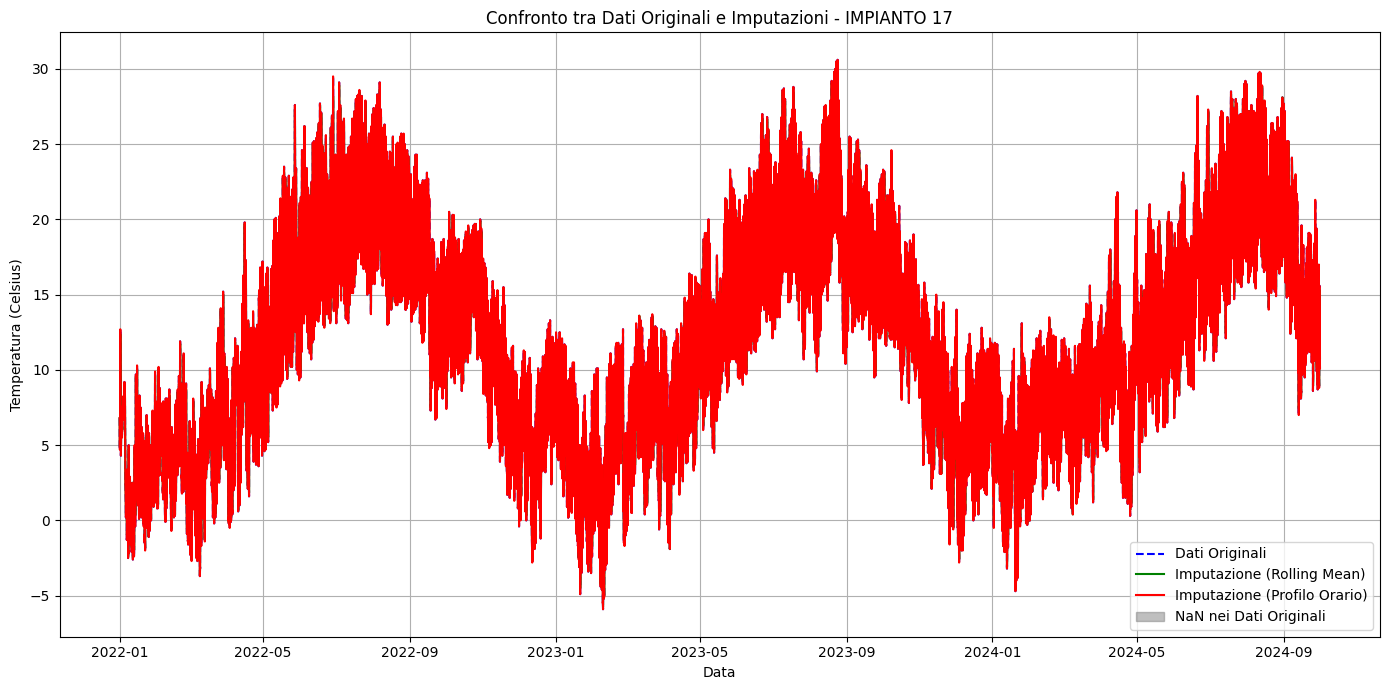

Elaborazione per IMPIANTO 18...
MAE Media Mobile per IMPIANTO 18: 1.0598
MAE Profilo Orario per IMPIANTO 18: 0.0000


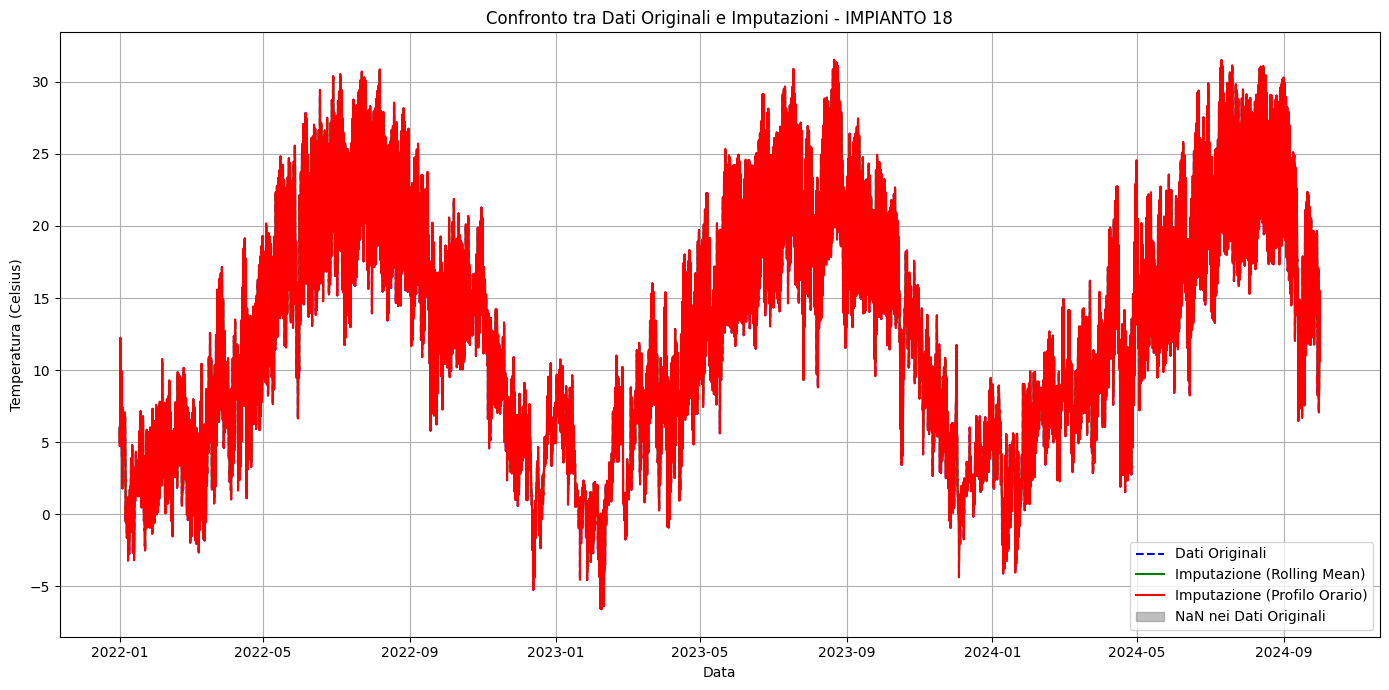

Elaborazione per IMPIANTO 19...
MAE Media Mobile per IMPIANTO 19: 1.1172
MAE Profilo Orario per IMPIANTO 19: 0.0000


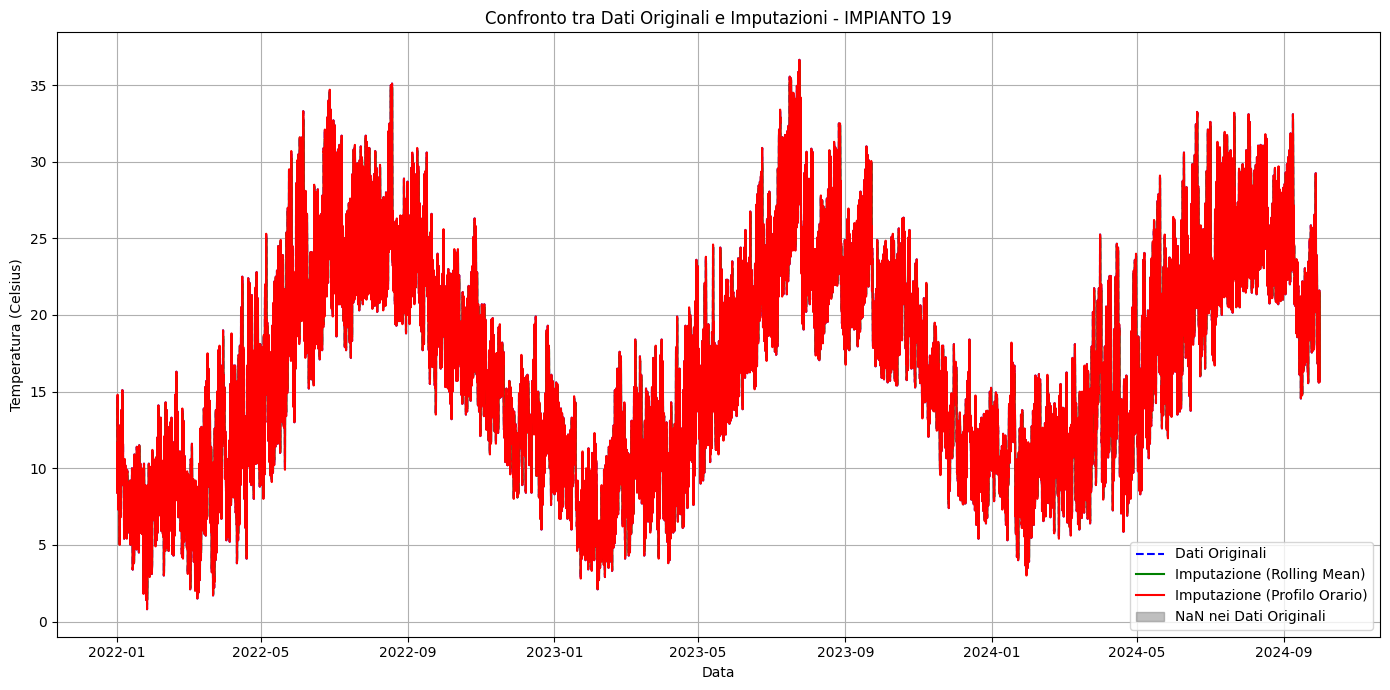

Elaborazione per IMPIANTO 20...
MAE Media Mobile per IMPIANTO 20: 1.3618
MAE Profilo Orario per IMPIANTO 20: 0.0000


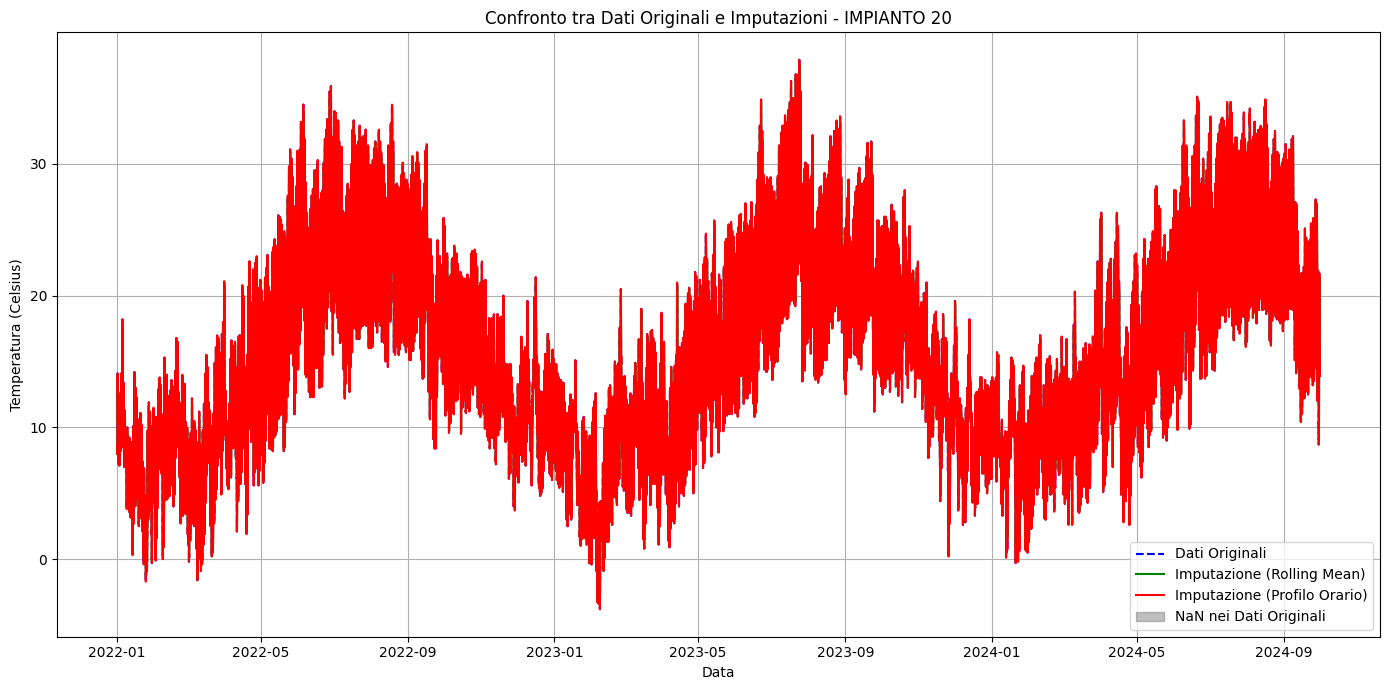


Risultati MAE per tutti gli impianti:
IMPIANTO 1 - MAE Media Mobile: 1.2271, MAE Profilo Orario: 0.0000
IMPIANTO 2 - MAE Media Mobile: 1.3812, MAE Profilo Orario: 0.0000
IMPIANTO 3 - MAE Media Mobile: 1.3004, MAE Profilo Orario: 0.0000
IMPIANTO 4 - MAE Media Mobile: 1.1408, MAE Profilo Orario: 0.0000
IMPIANTO 5 - MAE Media Mobile: 1.3366, MAE Profilo Orario: 0.0000
IMPIANTO 6 - MAE Media Mobile: 1.3604, MAE Profilo Orario: 0.0000
IMPIANTO 7 - MAE Media Mobile: 1.3230, MAE Profilo Orario: 0.0000
IMPIANTO 8 - MAE Media Mobile: 1.1048, MAE Profilo Orario: 0.0000
IMPIANTO 9 - MAE Media Mobile: 1.1897, MAE Profilo Orario: 0.0000
IMPIANTO 10 - MAE Media Mobile: 0.8081, MAE Profilo Orario: 0.0000
IMPIANTO 11 - MAE Media Mobile: 0.9916, MAE Profilo Orario: 0.0000
IMPIANTO 12 - MAE Media Mobile: 1.2220, MAE Profilo Orario: 0.0000
IMPIANTO 13 - MAE Media Mobile: 1.2946, MAE Profilo Orario: 0.0000
IMPIANTO 14 - MAE Media Mobile: 1.0861, MAE Profilo Orario: 0.0000
IMPIANTO 15 - MAE Media Mobile: 

In [86]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Caricamento dei dati
db_user = 'timescale'
db_password = '7qWCJhnIGAjZEbqB'
db_host = '188.245.188.140'
db_name = 'timescale'
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}')
query = """
SELECT timestamp, plant_id, flow, temperature_celsius, humidity_percentage, wind_speed_ms, precipitation_mm
FROM dataset_raw
"""
df = pd.read_sql(query, engine)

# Filtrare solo le colonne esogene, ma includere anche 'plant_id' per la pivot
cols_esogene = ['temperature_celsius', 'humidity_percentage', 'wind_speed_ms', 'precipitation_mm']
df_exogenous = df[['timestamp', 'plant_id'] + cols_esogene]

# Creiamo una lista vuota per raccogliere i risultati MAE per ogni impianto
mae_rolling_all = []
mae_profile_all = []
impianti = [f"IMPIANTO {i}" for i in range(1, 21)]

# Itera su ogni impianto
for plant_id in impianti:
    print(f"Elaborazione per {plant_id}...")

    # Estrai i dati relativi all'impianto
    df_impianto = df_exogenous[df_exogenous['plant_id'] == plant_id].copy()

    # Conserva i dati originali prima dell'imputazione
    df_original = df_impianto.copy()

    # Seleziona le colonne esogene per l'impianto
    df_impianto = df_impianto[['timestamp'] + cols_esogene].copy()

    # Media Mobile (Rolling Mean)
    window = 3  # Finestra della media mobile (3 ore)
    df_rolling = df_impianto[cols_esogene].rolling(window=window, min_periods=1).mean()

    # Imputazione tramite il profilo orario
    df_impianto['hour'] = df_impianto['timestamp'].dt.hour  # Aggiungi l'ora al DataFrame
    hourly_profile = df_impianto.groupby('hour')[cols_esogene].mean()

    # Imputazione tramite Profilo Orario
    df_profile_imputed = df_impianto.copy()
    if df_profile_imputed.index.duplicated().any():
        df_profile_imputed = df_profile_imputed.reset_index()

    for col in cols_esogene:
        missing_mask = df_profile_imputed[col].isna()
        df_profile_imputed.loc[missing_mask, col] = (
            df_profile_imputed.loc[missing_mask, 'hour'].map(hourly_profile[col])
        )

    # Calcolare l'errore assoluto medio (MAE) per Media Mobile
    mask_not_nan = ~df_impianto[cols_esogene].isna().any(axis=1)  # Maschera per righe senza NaN
    mae_rolling = mean_absolute_error(
        df_impianto.loc[mask_not_nan, cols_esogene],
        df_rolling.loc[mask_not_nan, cols_esogene]
    )

    # Calcolare l'errore assoluto medio (MAE) per Profilo Orario
    mae_profile = mean_absolute_error(
        df_impianto.loc[mask_not_nan, cols_esogene],
        df_profile_imputed.loc[mask_not_nan, cols_esogene]
    )

    # Salva i risultati MAE per ogni impianto
    mae_rolling_all.append(mae_rolling)
    mae_profile_all.append(mae_profile)

    print(f"MAE Media Mobile per {plant_id}: {mae_rolling:.4f}")
    print(f"MAE Profilo Orario per {plant_id}: {mae_profile:.4f}")

    # Visualizzazione dei dati originali e delle imputazioni
    plt.figure(figsize=(14, 7))

    # Plot dei dati originali (con NaN evidenziati)
    plt.plot(df_original['timestamp'], df_original['temperature_celsius'],
             label='Dati Originali', color='blue', linestyle='--')

    # Plot della Media Mobile (Rolling Mean)
    plt.plot(df_impianto['timestamp'], df_rolling['temperature_celsius'],
             label='Imputazione (Rolling Mean)', color='green')

    # Plot del Profilo Orario (Profile Imputed)
    plt.plot(df_impianto['timestamp'], df_profile_imputed['temperature_celsius'],
             label='Imputazione (Profilo Orario)', color='red')

    # Evidenziare NaN nei Dati Originali con una zona grigia
    plt.fill_between(df_original['timestamp'], df_original['temperature_celsius'],
                     where=df_original['temperature_celsius'].isna(), color='gray', alpha=0.5, label='NaN nei Dati Originali')

    # Aggiungere etichette
    plt.title(f"Confronto tra Dati Originali e Imputazioni - {plant_id}")
    plt.xlabel('Data')
    plt.ylabel('Temperatura (Celsius)')

    # Aggiungere la legenda
    plt.legend()

    # Visualizzare il grafico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Mostra i risultati complessivi
print("\nRisultati MAE per tutti gli impianti:")
for i, impianto in enumerate(impianti):
    print(f"{impianto} - MAE Media Mobile: {mae_rolling_all[i]:.4f}, MAE Profilo Orario: {mae_profile_all[i]:.4f}")


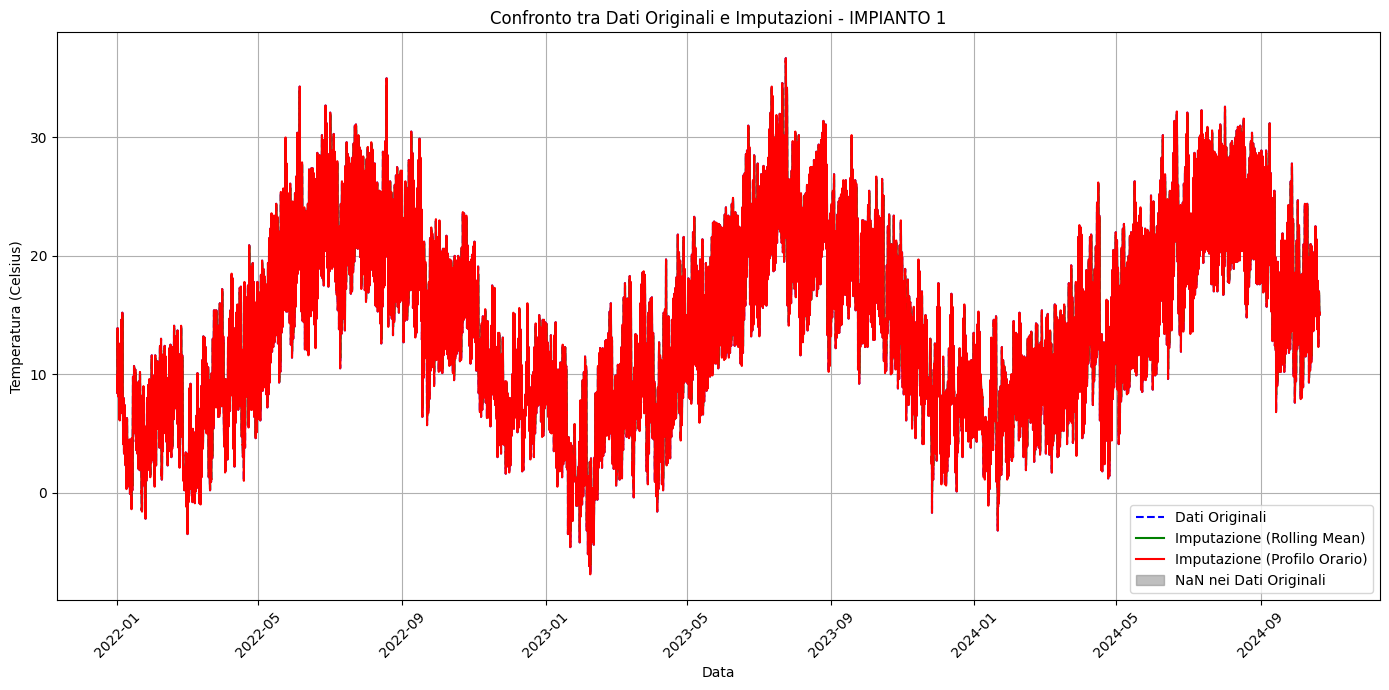

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Supponiamo che df_exogenous contenga i dati esogeni originali con NaN.
# Filtro per un impianto specifico
plant_id = 'IMPIANTO 1'  # Sostituisci con l'impianto di interesse
df_impianto = df_exogenous[df_exogenous['plant_id'] == plant_id].copy()

# Conserva una copia dei dati originali (con NaN) prima dell'imputazione
df_original = df_impianto.copy()

# Media Mobile (Rolling Mean)
window = 3
df_rolling = df_impianto[cols_esogene].rolling(window=window, min_periods=1).mean()

# Profilo Orario
df_impianto['hour'] = df_impianto['timestamp'].dt.hour
hourly_profile = df_impianto.groupby('hour')[cols_esogene].mean()

# Imputazione tramite Profilo Orario
df_profile_imputed = df_impianto.copy()
for col in cols_esogene:
    missing_mask = df_profile_imputed[col].isna()
    df_profile_imputed.loc[missing_mask, col] = df_profile_imputed.loc[missing_mask, 'hour'].map(hourly_profile[col])

# Plot dei risultati
plt.figure(figsize=(14, 7))

# Dati Originali (con NaN evidenziati)
plt.plot(df_original['timestamp'], df_original['temperature_celsius'], label='Dati Originali', color='blue', linestyle='--')

# Media Mobile
plt.plot(df_impianto['timestamp'], df_rolling['temperature_celsius'], label='Imputazione (Rolling Mean)', color='green')

# Profilo Orario
plt.plot(df_impianto['timestamp'], df_profile_imputed['temperature_celsius'], label='Imputazione (Profilo Orario)', color='red')

# Evidenziare NaN nei Dati Originali con una zona grigia
plt.fill_between(df_original['timestamp'], df_original['temperature_celsius'],
                 where=df_original['temperature_celsius'].isna(), color='gray', alpha=0.5, label='NaN nei Dati Originali')

# Aggiungere etichette
plt.title(f"Confronto tra Dati Originali e Imputazioni - {plant_id}")
plt.xlabel('Data')
plt.ylabel('Temperatura (Celsius)')

# Modifica i tick dell'asse X per visualizzare un formato leggibile
plt.xticks(rotation=45)
plt.grid(True)

# Mostra la legenda
plt.legend()

# Ottimizza la disposizione
plt.tight_layout()

# Mostra il grafico
plt.show()



<ipython-input-88-5a74babf218d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zoomed['hour'] = df_zoomed['timestamp'].dt.hour


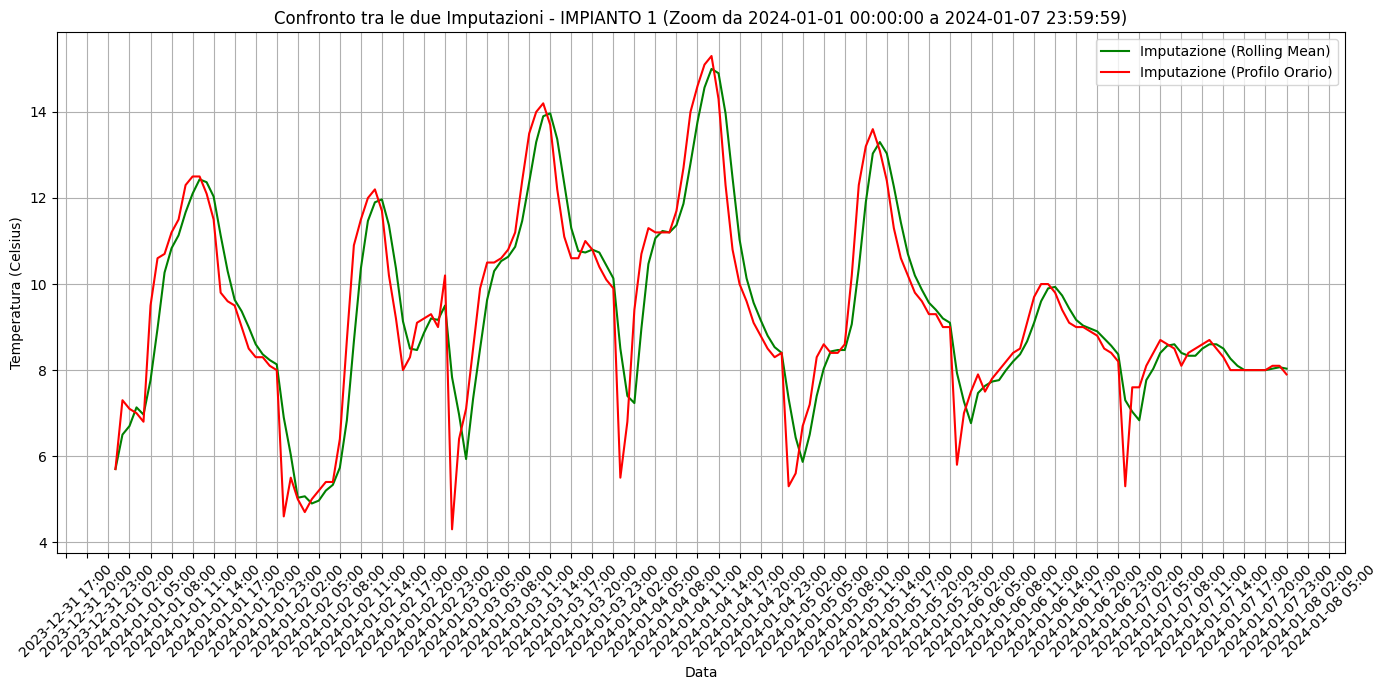

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Supponiamo di voler zoomare su una finestra temporale
zoom_start = '2024-01-01 00:00:00'  # Inizio della finestra di zoom
zoom_end = '2024-01-07 23:59:59'  # Fine della finestra di zoom

# Filtro per un impianto specifico
plant_id = 'IMPIANTO 1'  # Sostituisci con l'impianto di interesse
df_impianto = df_exogenous[df_exogenous['plant_id'] == plant_id].copy()

# Conserva una copia dei dati originali (con NaN)
df_original = df_impianto.copy()

# Converte la colonna 'timestamp' in datetime (se non è già)
df_impianto['timestamp'] = pd.to_datetime(df_impianto['timestamp'])

# Filtra i dati per l'intervallo di tempo di interesse (zoom)
df_zoomed = df_impianto[(df_impianto['timestamp'] >= zoom_start) & (df_impianto['timestamp'] <= zoom_end)]
df_original_zoomed = df_original[(df_original['timestamp'] >= zoom_start) & (df_original['timestamp'] <= zoom_end)]

# Media Mobile (Rolling Mean)
window = 3
df_rolling_zoomed = df_zoomed[cols_esogene].rolling(window=window, min_periods=1).mean()

# Profilo Orario per i dati zoomati
df_zoomed['hour'] = df_zoomed['timestamp'].dt.hour
hourly_profile_zoomed = df_zoomed.groupby('hour')[cols_esogene].mean()

# Imputazione tramite Profilo Orario (per i dati zoomati)
df_profile_imputed_zoomed = df_zoomed.copy()
for col in cols_esogene:
    missing_mask = df_profile_imputed_zoomed[col].isna()
    df_profile_imputed_zoomed.loc[missing_mask, col] = df_profile_imputed_zoomed.loc[missing_mask, 'hour'].map(hourly_profile_zoomed[col])

# Creazione del grafico con zoom
plt.figure(figsize=(14, 7))

# Plot della Media Mobile
plt.plot(df_zoomed['timestamp'], df_rolling_zoomed['temperature_celsius'],
         label='Imputazione (Rolling Mean)', color='green')

# Plot del Profilo Orario
plt.plot(df_zoomed['timestamp'], df_profile_imputed_zoomed['temperature_celsius'],
         label='Imputazione (Profilo Orario)', color='red')

# Aggiungere etichette
plt.title(f"Confronto tra le due Imputazioni - {plant_id} (Zoom da {zoom_start} a {zoom_end})")
plt.xlabel('Data')
plt.ylabel('Temperatura (Celsius)')

# Modifica i tick dell'asse X per visualizzare un formato leggibile
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Visualizza tick ogni 3 ore
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# Mostra la legenda
plt.legend()

# Aggiungere la griglia
plt.grid(True)

# Ottimizza la disposizione
plt.tight_layout()

# Mostra il grafico
plt.show()


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Caricamento dei dati
db_user = 'timescale'
db_password = '7qWCJhnIGAjZEbqB'
db_host = '188.245.188.140'
db_name = 'timescale'
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}')
query = """
SELECT timestamp, plant_id, flow, temperature_celsius, humidity_percentage, wind_speed_ms, precipitation_mm
FROM dataset_raw
"""
df = pd.read_sql(query, engine)

# Filtrare solo le colonne esogene
cols_esogene = ['temperature_celsius', 'humidity_percentage', 'wind_speed_ms', 'precipitation_mm']
df_exogenous = df[['timestamp', 'plant_id'] + cols_esogene]

# Convertiamo 'timestamp' in formato datetime
df_exogenous['timestamp'] = pd.to_datetime(df_exogenous['timestamp'])
df_exogenous = df_exogenous.set_index('timestamp')

# Resample to hourly frequency
df_exogenous_h = df_exogenous.groupby('plant_id').resample('h').asfreq()

# Visualizzare i NaN nel DataFrame originale
print("NaN nel DataFrame iniziale:")
print(df_exogenous_h.isna().sum())



<ipython-input-66-6e311c9a230e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exogenous['timestamp'] = pd.to_datetime(df_exogenous['timestamp'])


NaN nel DataFrame iniziale:
plant_id               106
temperature_celsius    106
humidity_percentage    106
wind_speed_ms          106
precipitation_mm       106
dtype: int64


In [77]:
# Funzione per eseguire imputazione e visualizzare i grafici
def imputazione_per_variabile(plant_id, col):
    # Estrai i dati relativi all'impianto
    df_impianto = df_exogenous_h.xs(plant_id, level='plant_id').copy()

    # Conserva i dati originali
    df_original = df_impianto.copy()

    # Seleziona solo la colonna esogena specificata
    df_impianto = df_impianto[[col]].copy()

    # Identificare i punti NaN nei dati originali
    nan_mask = df_impianto[col].isna()

    # Calcolare l'intervallo settimanale per la variabile esogena
    nan_dates = df_original.index[nan_mask]

    if nan_mask.any():  # Se ci sono NaN
        # Intervallo settimanale: Una settimana prima e una settimana dopo il primo NaN
        zoom_start_date = nan_dates.min() - pd.DateOffset(weeks=1)
        zoom_end_date = nan_dates.min() + pd.DateOffset(weeks=1)
        print(f"Intervallo settimanale per {col} in {plant_id}: {zoom_start_date} - {zoom_end_date}")
    else:
        print(f"Nessun NaN trovato per {col} in {plant_id}, salto il calcolo per questa variabile.")
        return

    # Filtro per lo zoom settimanale
    mask_zoom = (df_impianto.index >= zoom_start_date) & (df_impianto.index <= zoom_end_date)
    df_impianto_zoom = df_impianto[mask_zoom]
    df_original_zoom = df_original[mask_zoom]
    nan_mask_zoom = df_impianto_zoom[col].isna()  # Maschera dei NaN nel range zoomato

    # Calcolare la Media Mobile (Rolling Mean)
    window = 3  # Finestra della media mobile (3 ore)
    df_rolling = df_impianto_zoom.rolling(window=window, min_periods=1).mean()

    # Esegui l'imputazione del profilo orario
    df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
    hourly_profile = df_impianto_zoom.groupby('hour')[col].mean()

    df_profile_imputed = df_impianto_zoom.copy()
    missing_mask = df_profile_imputed[col].isna()
    df_profile_imputed.loc[missing_mask, col] = df_profile_imputed.loc[missing_mask, 'hour'].map(hourly_profile)

    mask_zoom_rolling = (df_rolling.index >= zoom_start_date) & (df_rolling.index <= zoom_end_date)

    # Visualizzazione dei dati zoomati per la colonna esogena
    plt.figure(figsize=(14, 7))
    df_original_zoom[col].fillna(0, inplace=True)
    # Plot della Media Mobile (Rolling Mean)
    plt.plot(df_rolling.index[mask_zoom_rolling], df_rolling.loc[mask_zoom_rolling, col],
              label=f'Imputazione (Rolling Mean) - {col}', color='green')

    # Plot del Profilo Orario (Profile Imputed)
    plt.plot(df_impianto_zoom.index, df_profile_imputed[col],
              label=f'Imputazione (Profilo Orario) - {col}', color='blue')

    # Plot dei dati originali (con NaN evidenziati)
    plt.plot(df_impianto_zoom.index, df_original_zoom[col],
              label=f'Dati Originali - {col}', color='orange', linestyle='--')

    # Evidenziare i NaN sui grafici
    #plt.fill_between(df_impianto_zoom.index, df_original_zoom[col],
    #                  where=nan_mask_zoom, color='gray', alpha=0.5, label='NaN nei Dati Originali')

    # Aggiungere marker per i NaN
    plt.scatter(df_original_zoom.index[nan_mask_zoom], df_original_zoom[col][nan_mask_zoom],
                color='red', zorder=5, label='Punti NaN')

    # Aggiungere etichette
    plt.title(f"Confronto tra Dati Originali e Imputazioni per {plant_id} - {col} (Zoom Settimanale da {zoom_start_date} a {zoom_end_date})")
    plt.xlabel('Data')
    plt.ylabel(f'{col}')

    # Aggiungere la legenda
    plt.legend()

    # Visualizzare il grafico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Intervallo settimanale per temperature_celsius in IMPIANTO 1: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

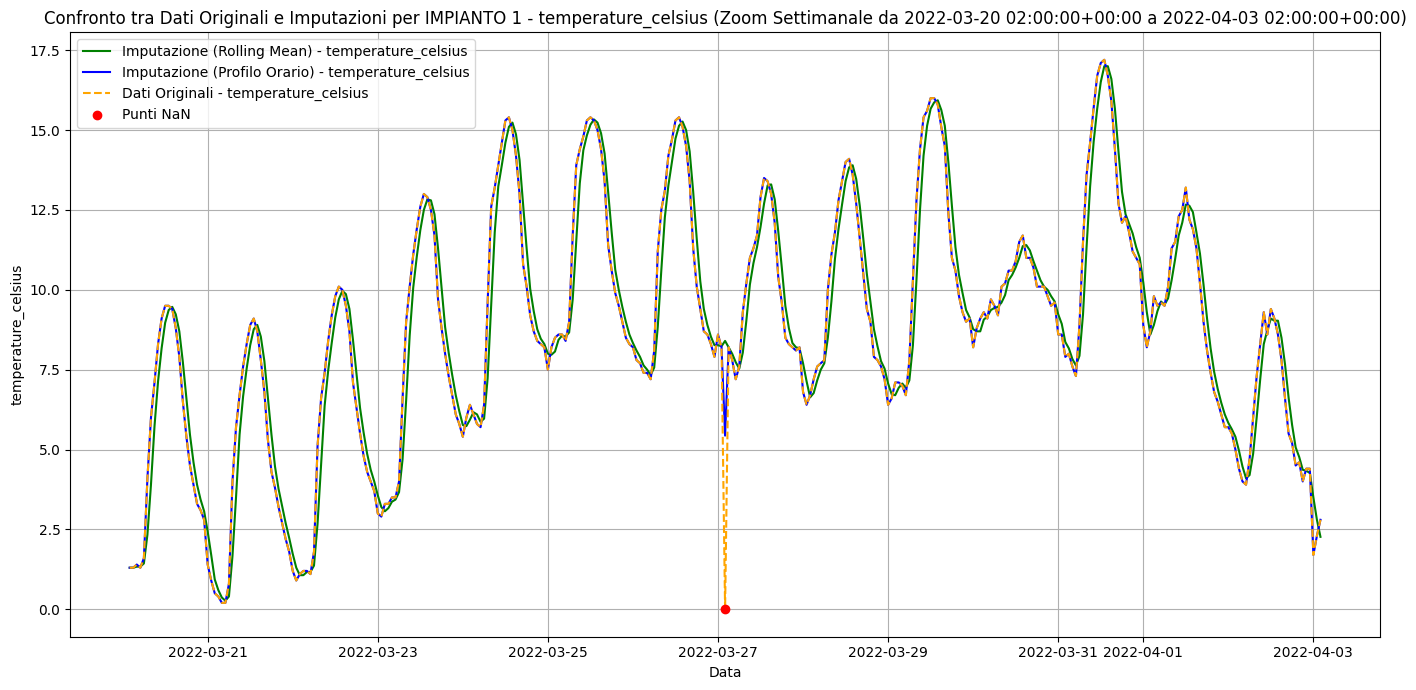

Intervallo settimanale per humidity_percentage in IMPIANTO 1: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

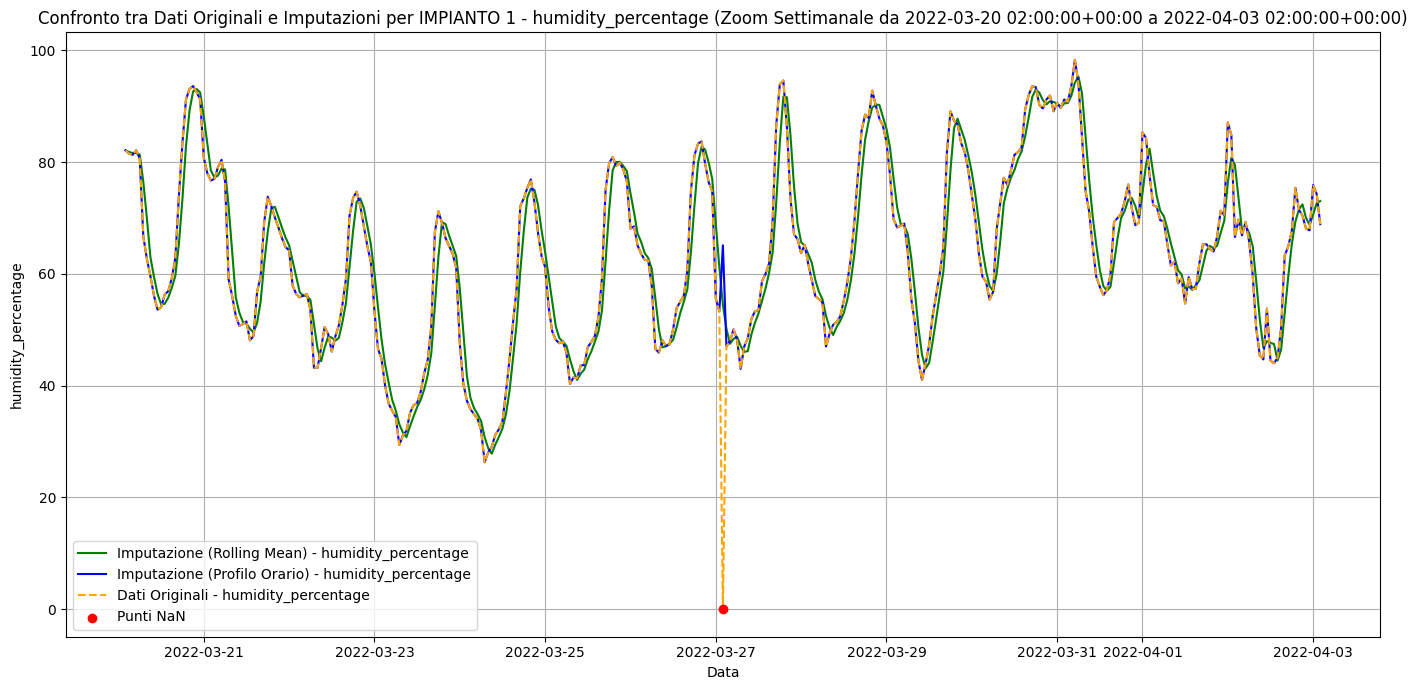

Intervallo settimanale per wind_speed_ms in IMPIANTO 1: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

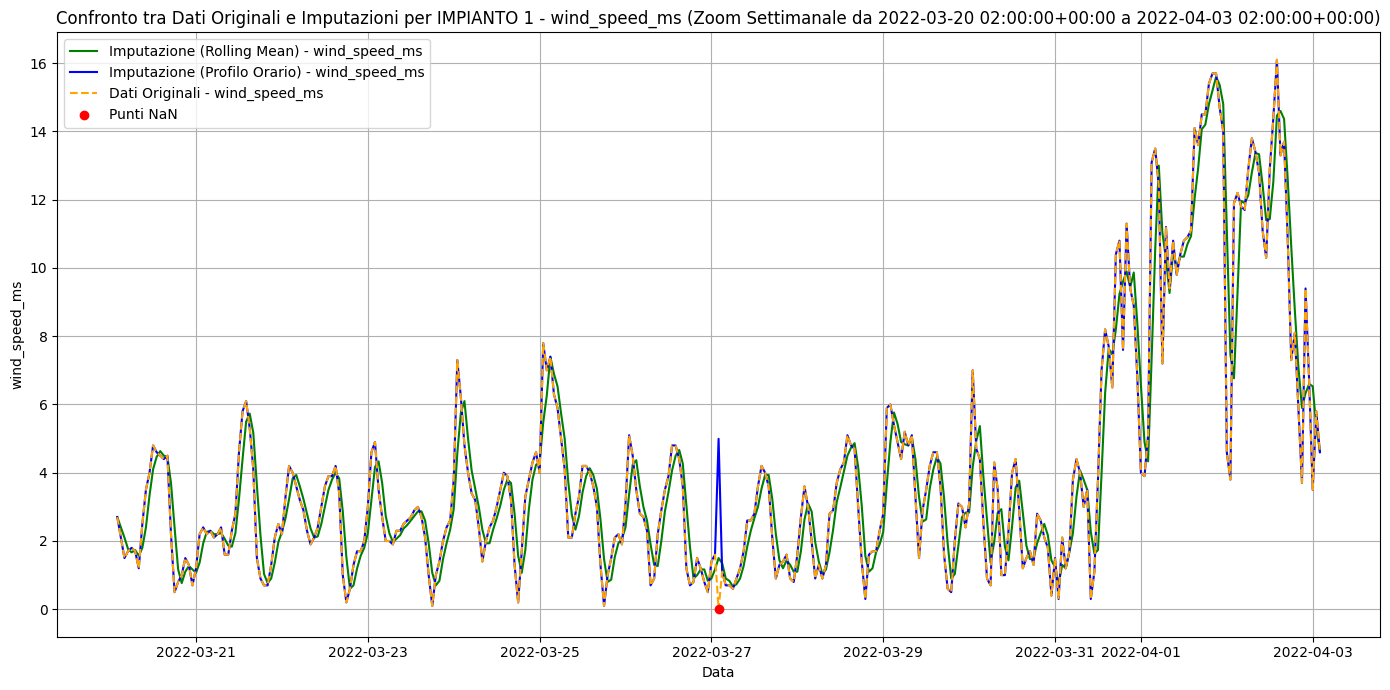

Intervallo settimanale per precipitation_mm in IMPIANTO 1: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

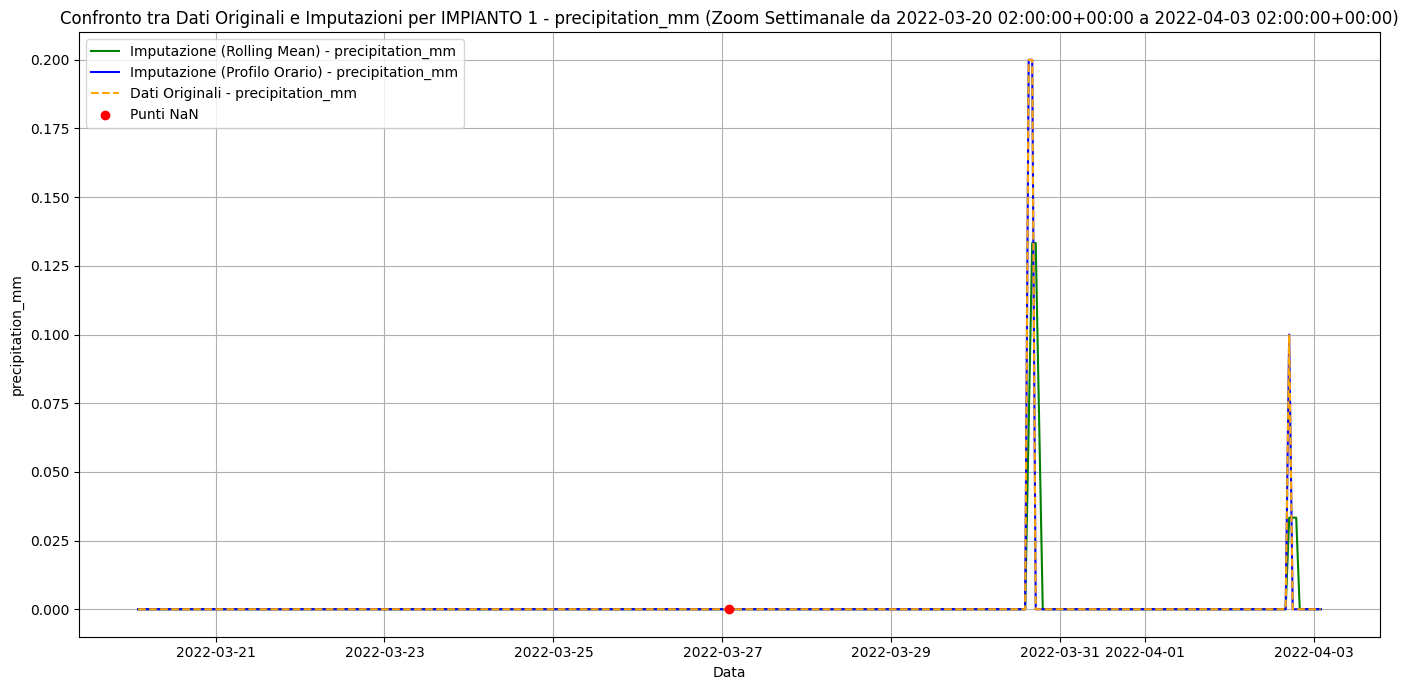

In [78]:
# Esegui l'imputazione per una specifica variabile e impianto
impianto = "IMPIANTO 1"
variabile = 'temperature_celsius'
imputazione_per_variabile(impianto, variabile)
variabile = 'humidity_percentage'
imputazione_per_variabile(impianto, variabile)
variabile = 'wind_speed_ms'
imputazione_per_variabile(impianto, variabile)
variabile = 'precipitation_mm'
imputazione_per_variabile(impianto, variabile)

Intervallo settimanale per temperature_celsius in IMPIANTO 2: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

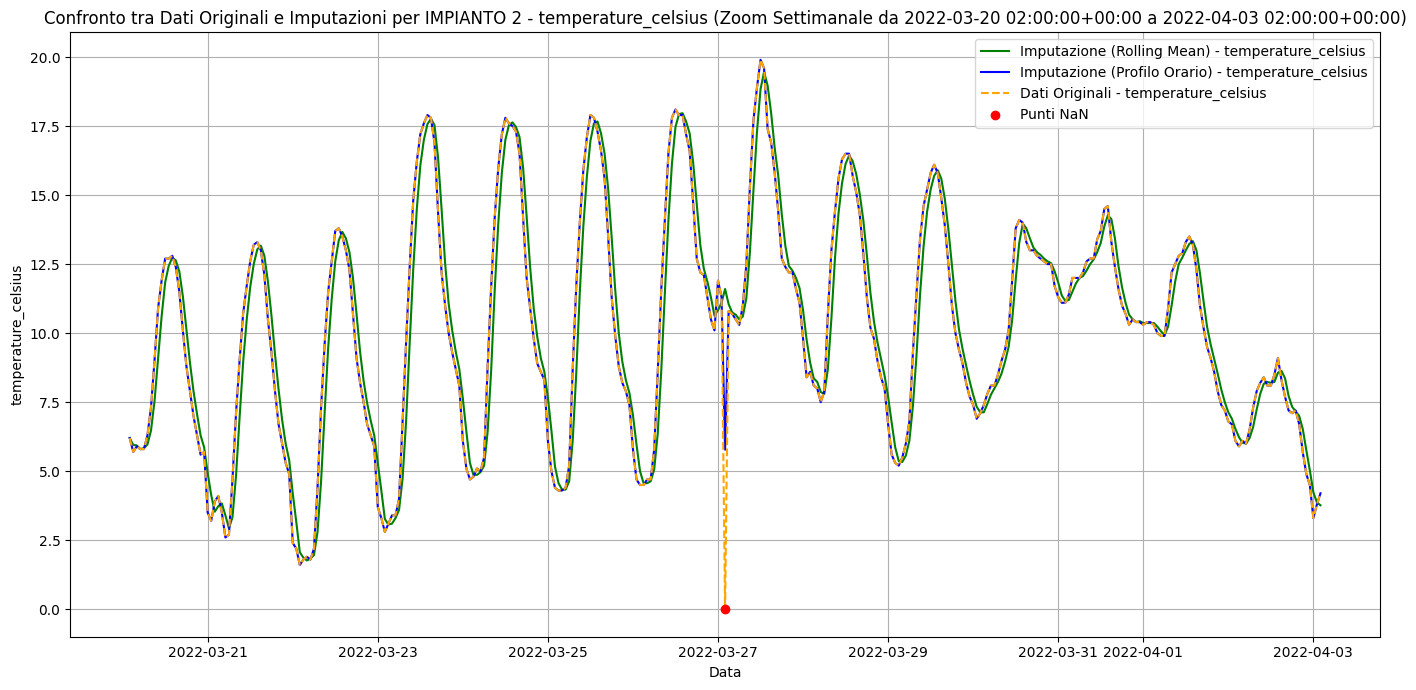

Intervallo settimanale per humidity_percentage in IMPIANTO 2: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

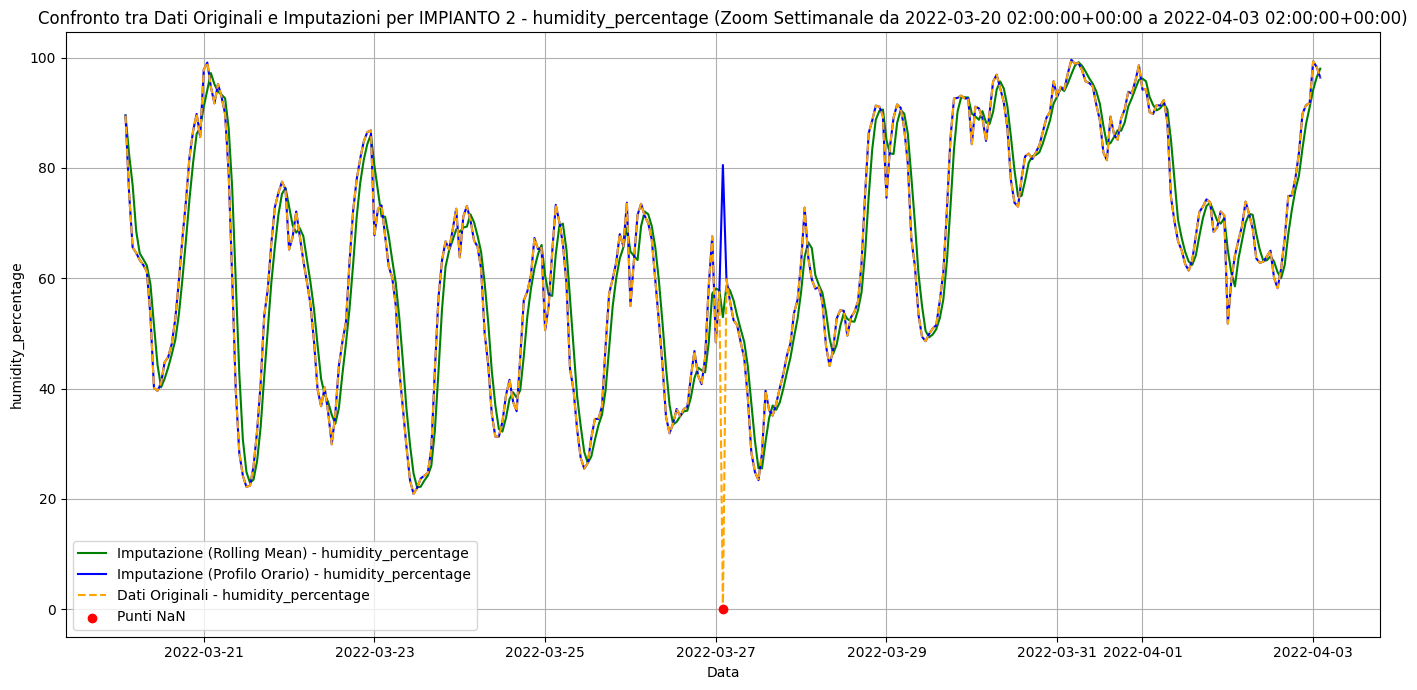

Intervallo settimanale per wind_speed_ms in IMPIANTO 2: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

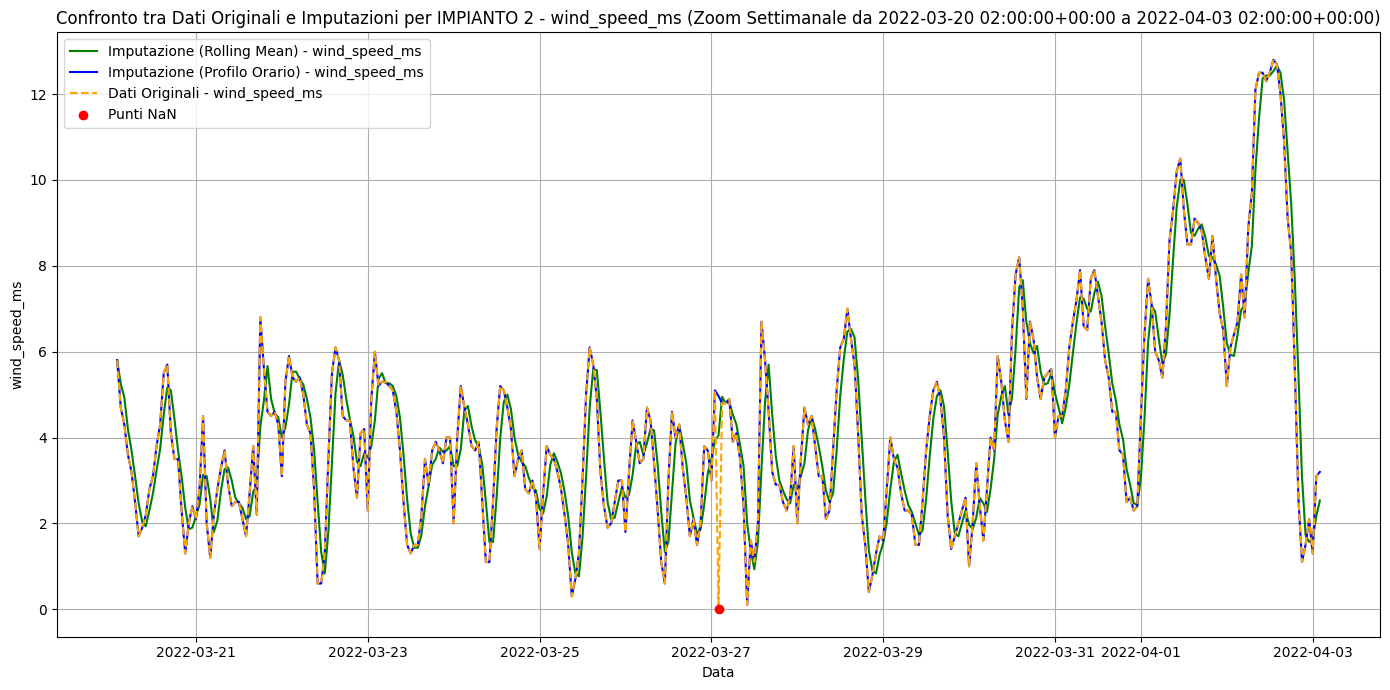

Intervallo settimanale per precipitation_mm in IMPIANTO 2: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

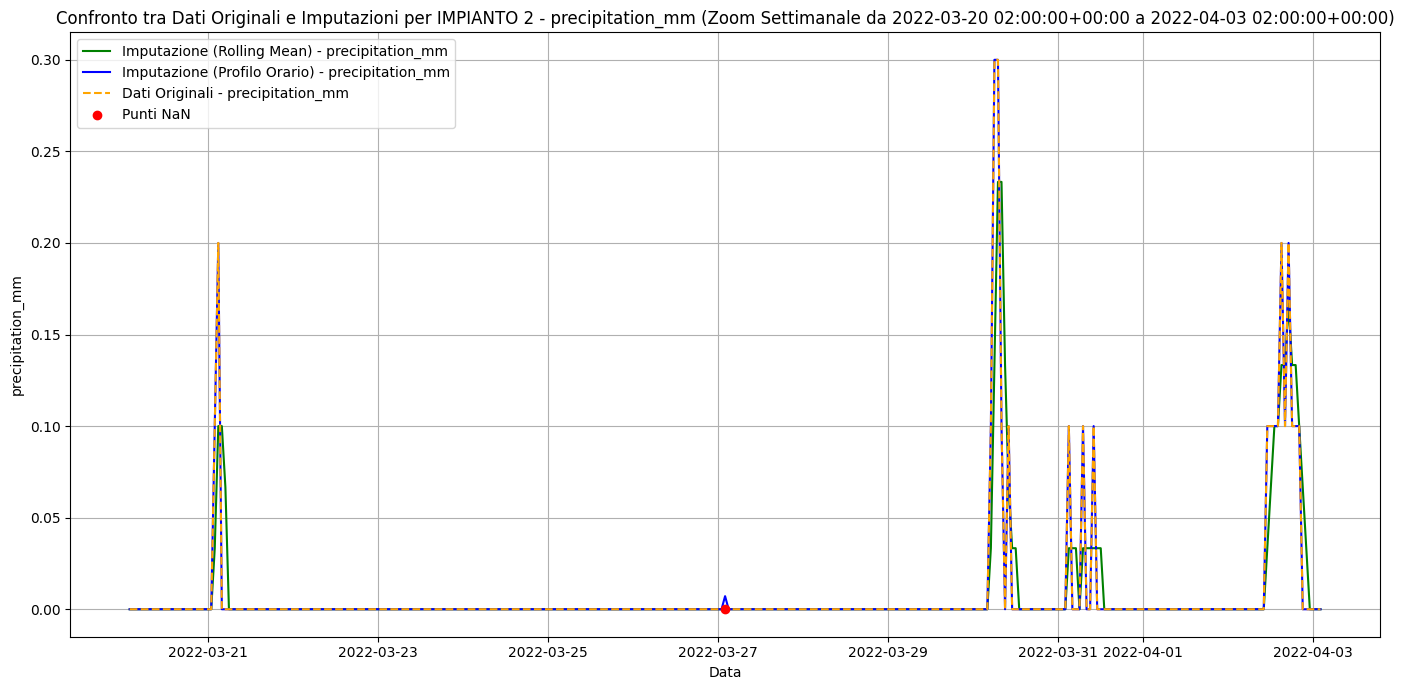

In [79]:
# Esegui l'imputazione per una specifica variabile e impianto
impianto = "IMPIANTO 2"
variabile = 'temperature_celsius'
imputazione_per_variabile(impianto, variabile)
variabile = 'humidity_percentage'
imputazione_per_variabile(impianto, variabile)
variabile = 'wind_speed_ms'
imputazione_per_variabile(impianto, variabile)
variabile = 'precipitation_mm'
imputazione_per_variabile(impianto, variabile)

Intervallo settimanale per temperature_celsius in IMPIANTO 3: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

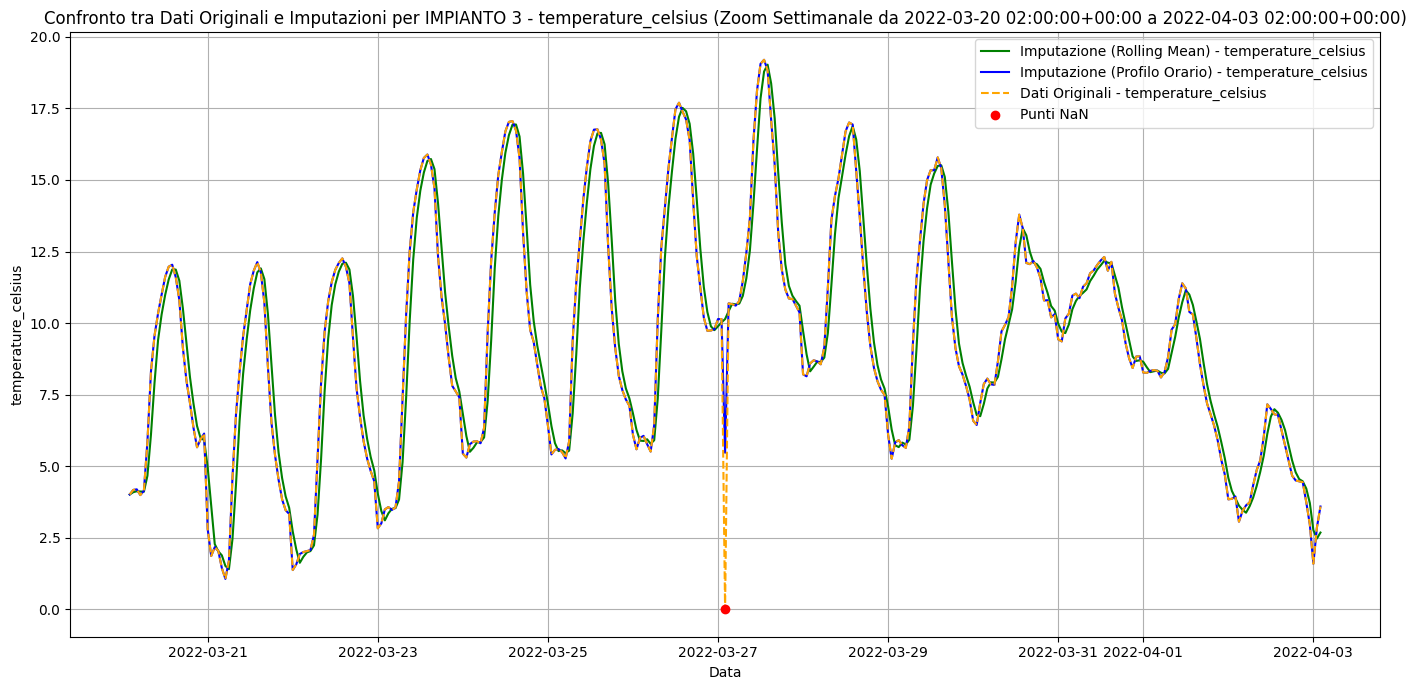

Intervallo settimanale per humidity_percentage in IMPIANTO 3: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

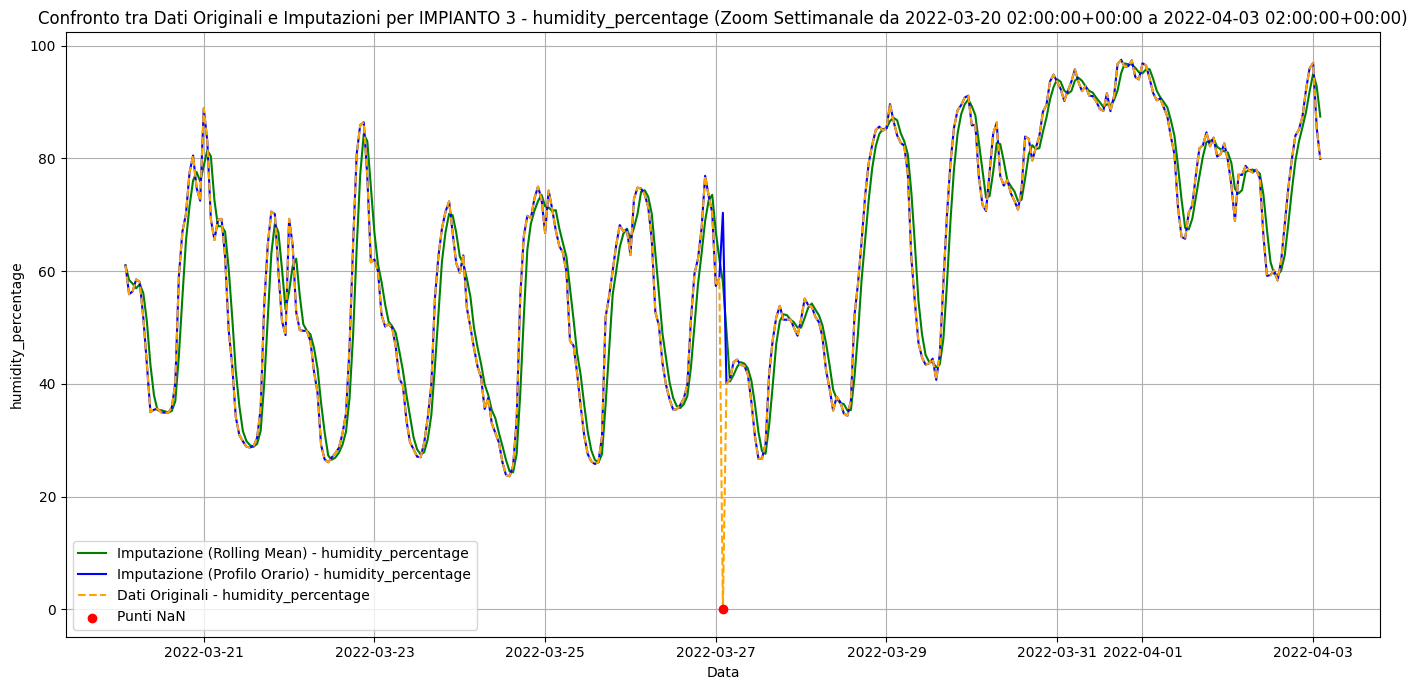

Intervallo settimanale per wind_speed_ms in IMPIANTO 3: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

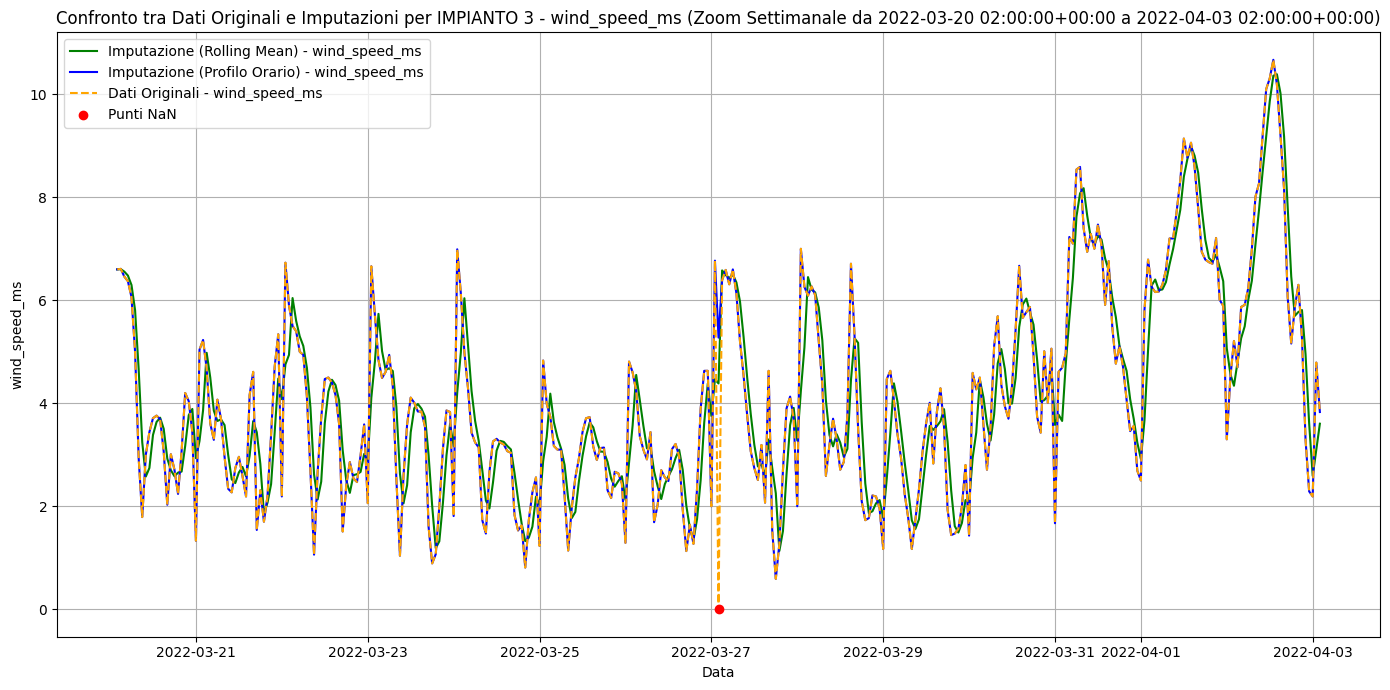

Intervallo settimanale per precipitation_mm in IMPIANTO 3: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

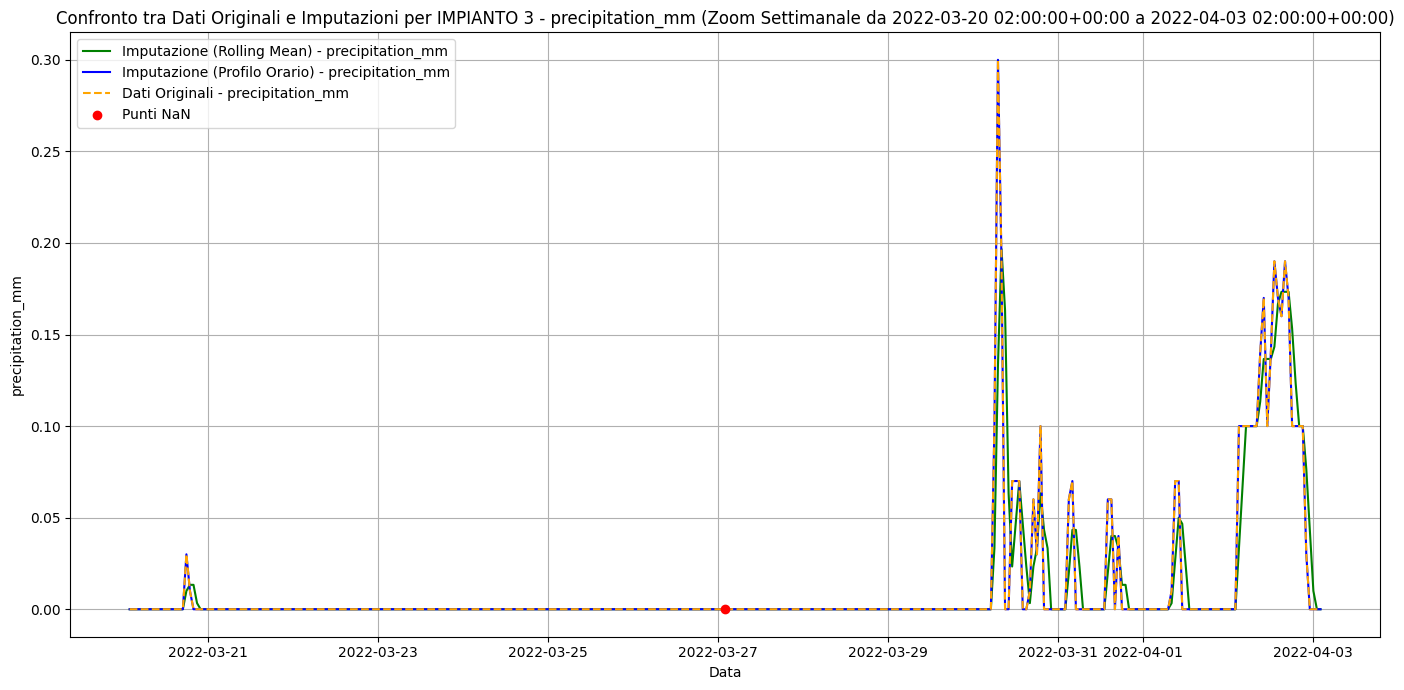

In [80]:
# Esegui l'imputazione per una specifica variabile e impianto
impianto = "IMPIANTO 3"
variabile = 'temperature_celsius'
imputazione_per_variabile(impianto, variabile)
variabile = 'humidity_percentage'
imputazione_per_variabile(impianto, variabile)
variabile = 'wind_speed_ms'
imputazione_per_variabile(impianto, variabile)
variabile = 'precipitation_mm'
imputazione_per_variabile(impianto, variabile)

Intervallo settimanale per temperature_celsius in IMPIANTO 4: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

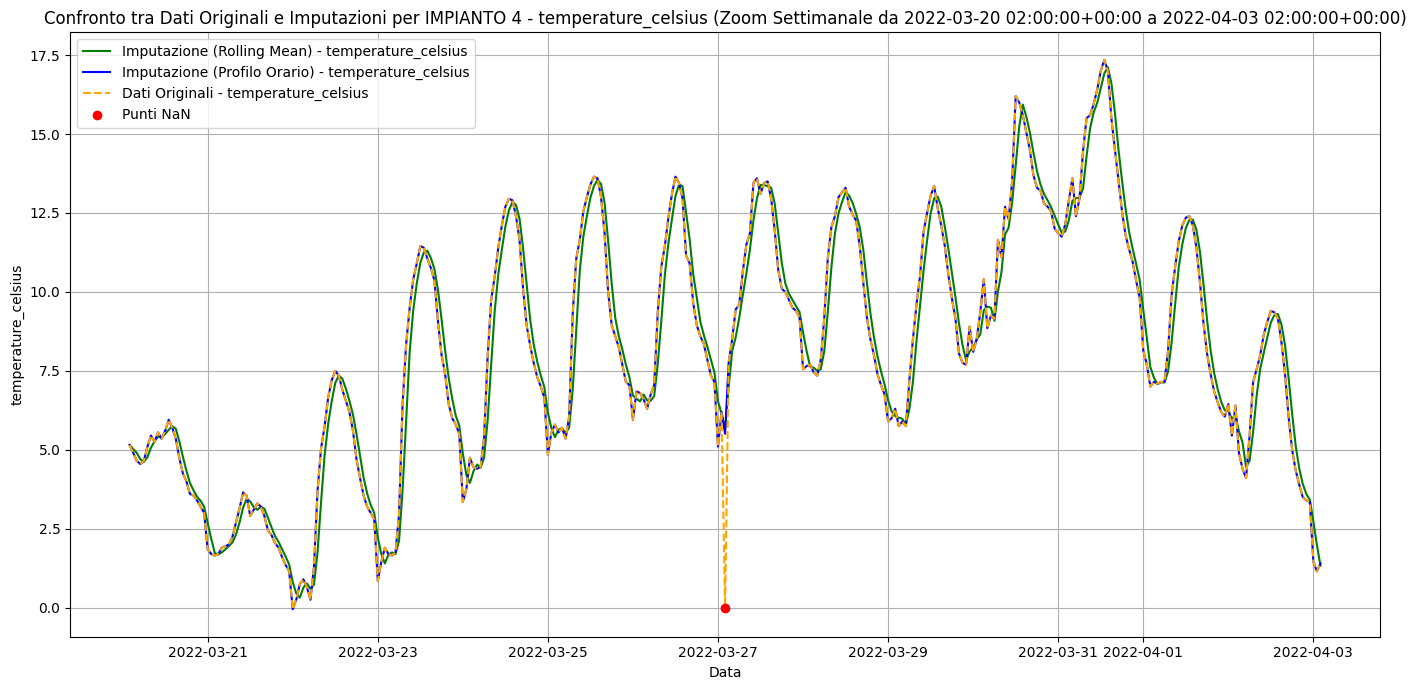

Intervallo settimanale per humidity_percentage in IMPIANTO 4: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

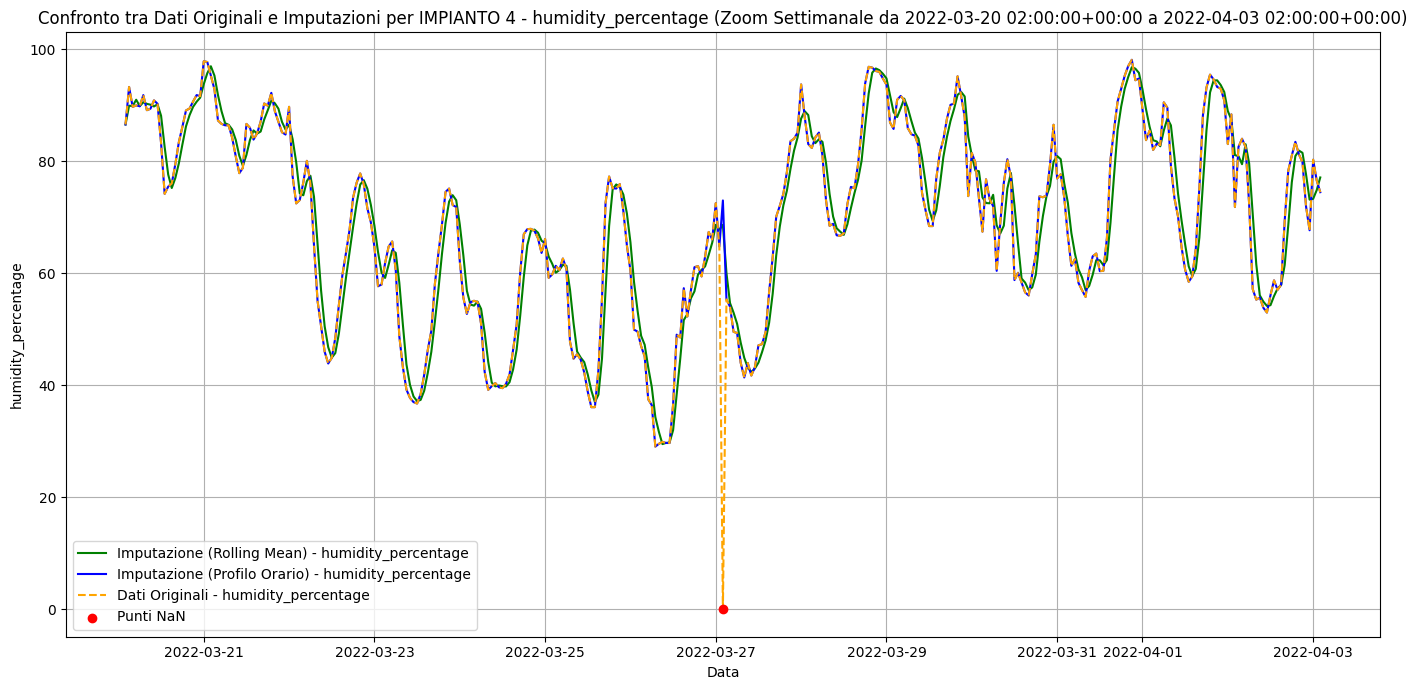

Intervallo settimanale per wind_speed_ms in IMPIANTO 4: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

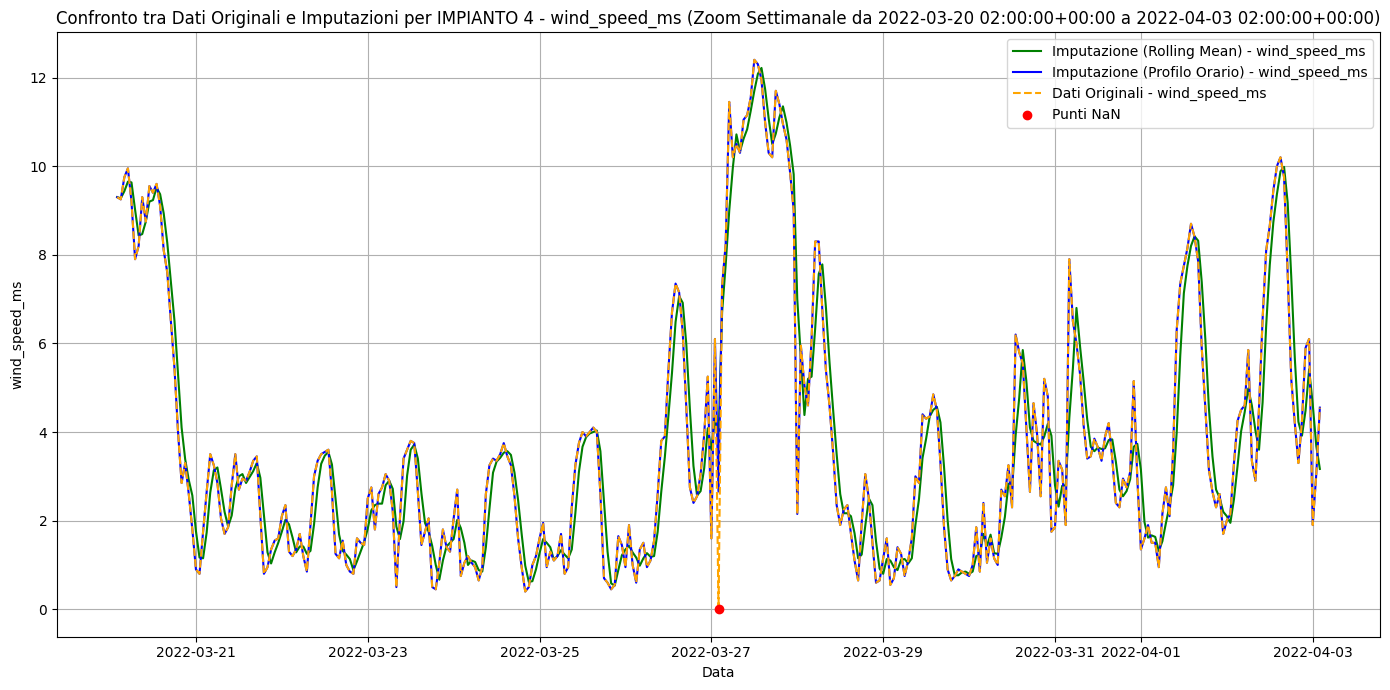

Intervallo settimanale per precipitation_mm in IMPIANTO 4: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

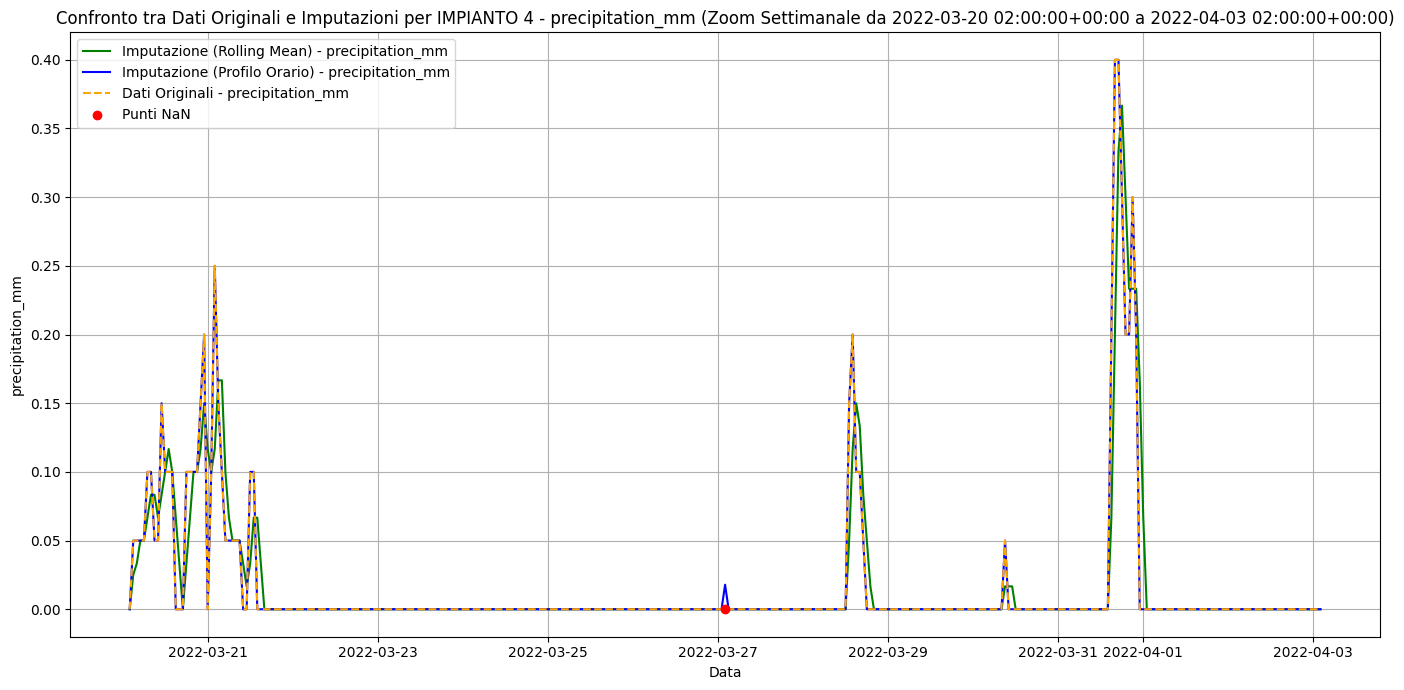

In [81]:
# Esegui l'imputazione per una specifica variabile e impianto
impianto = "IMPIANTO 4"
variabile = 'temperature_celsius'
imputazione_per_variabile(impianto, variabile)
variabile = 'humidity_percentage'
imputazione_per_variabile(impianto, variabile)
variabile = 'wind_speed_ms'
imputazione_per_variabile(impianto, variabile)
variabile = 'precipitation_mm'
imputazione_per_variabile(impianto, variabile)

Intervallo settimanale per temperature_celsius in IMPIANTO 5: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

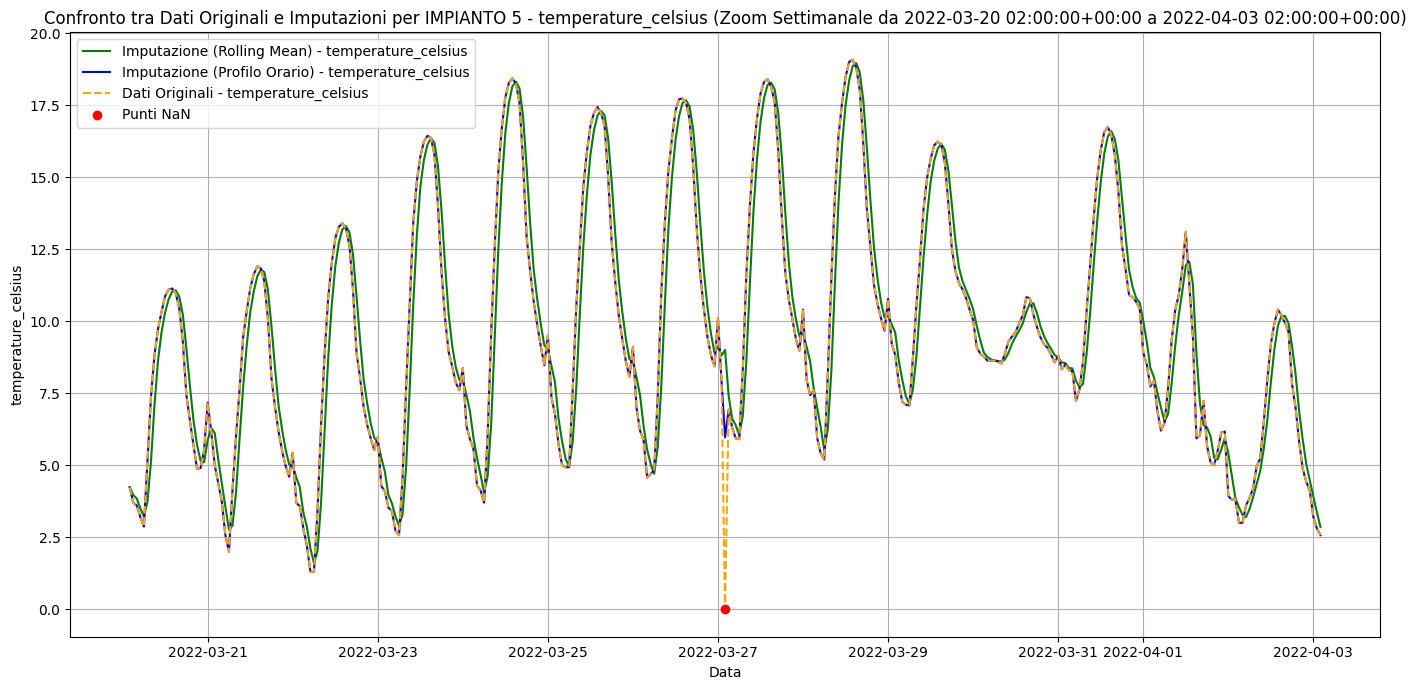

Intervallo settimanale per humidity_percentage in IMPIANTO 5: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

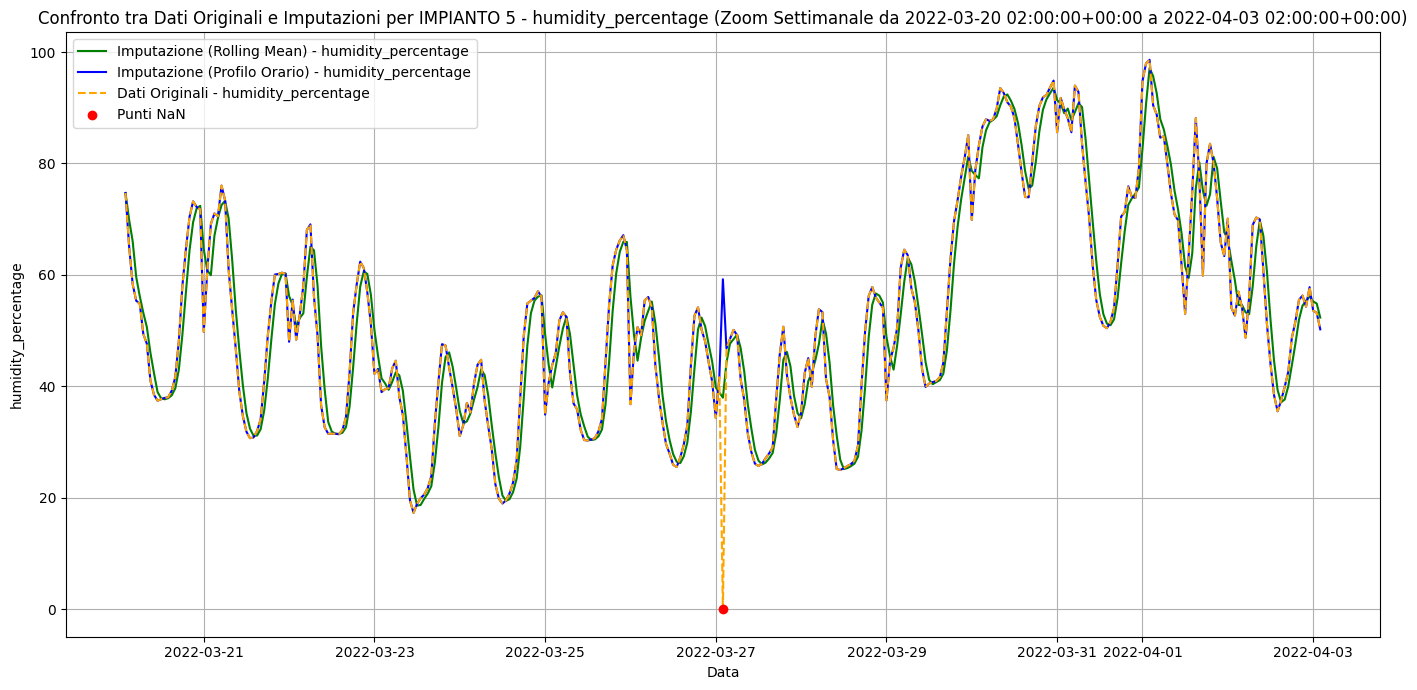

Intervallo settimanale per wind_speed_ms in IMPIANTO 5: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

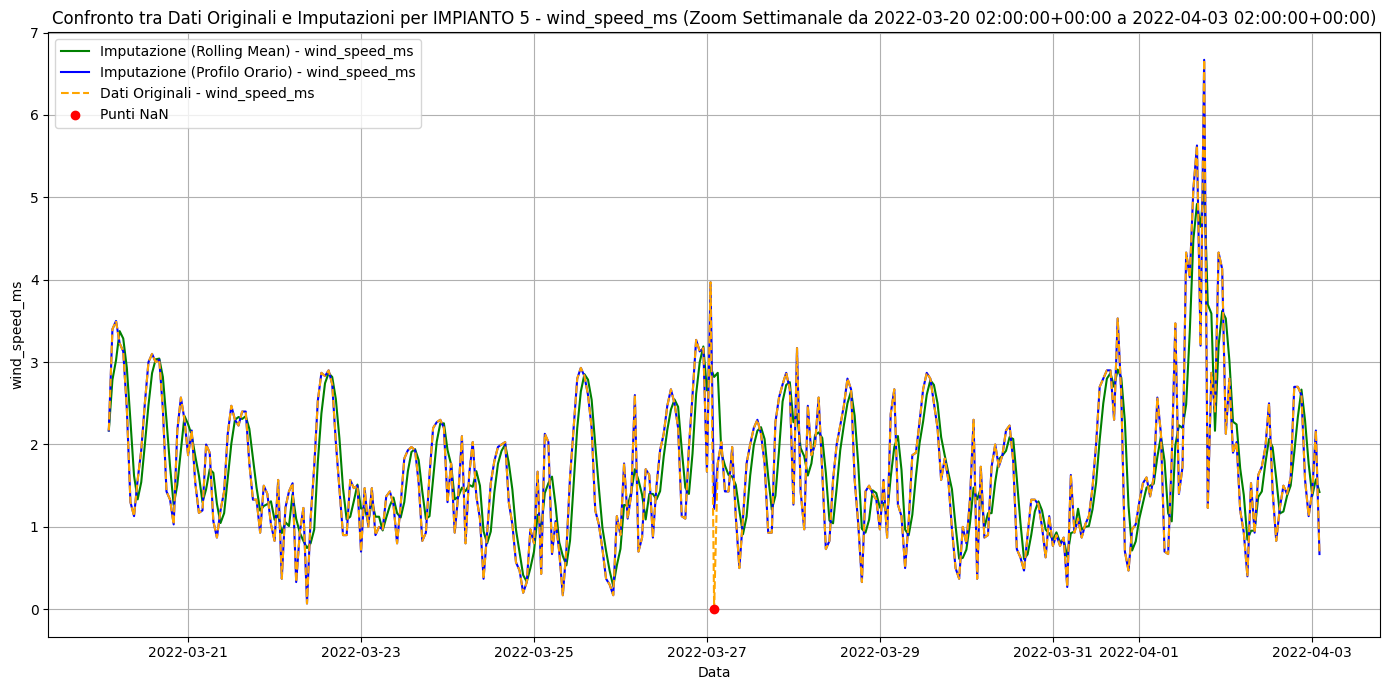

Intervallo settimanale per precipitation_mm in IMPIANTO 5: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

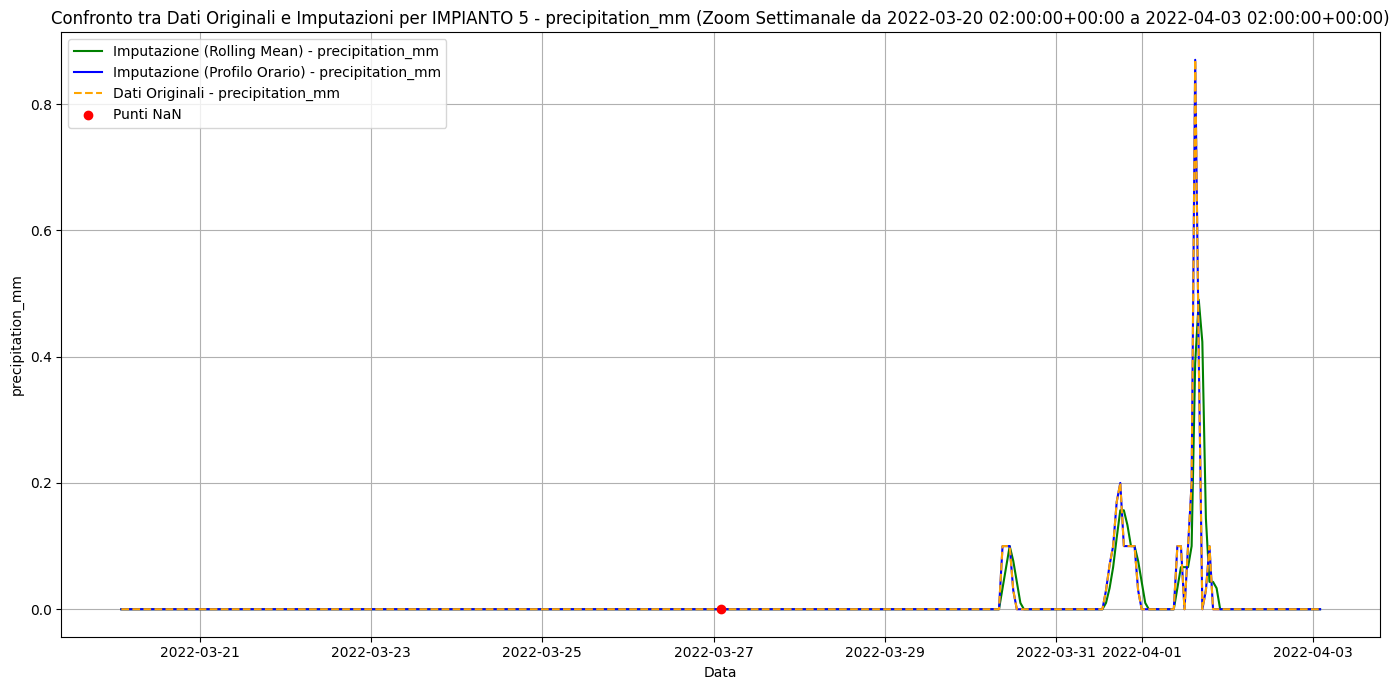

In [82]:
# Esegui l'imputazione per una specifica variabile e impianto
impianto = "IMPIANTO 5"
variabile = 'temperature_celsius'
imputazione_per_variabile(impianto, variabile)
variabile = 'humidity_percentage'
imputazione_per_variabile(impianto, variabile)
variabile = 'wind_speed_ms'
imputazione_per_variabile(impianto, variabile)
variabile = 'precipitation_mm'
imputazione_per_variabile(impianto, variabile)

Intervallo settimanale per temperature_celsius in IMPIANTO 6: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

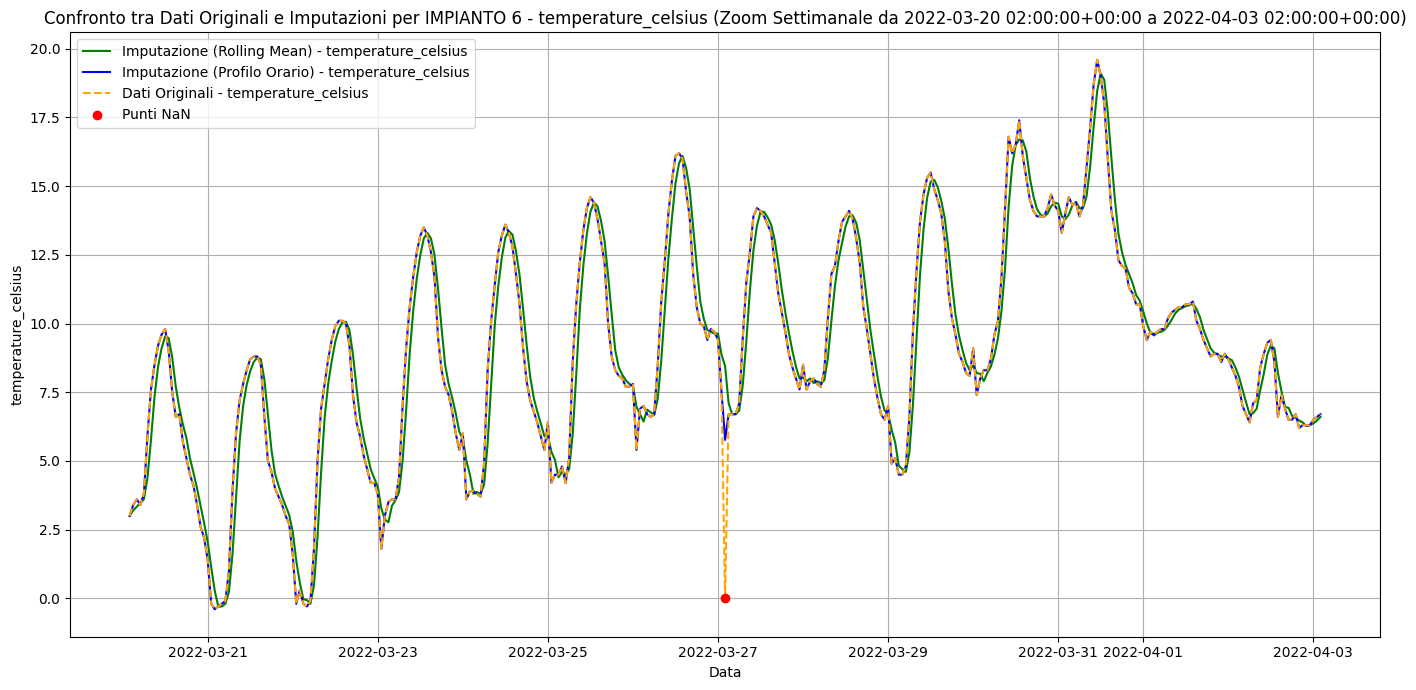

Intervallo settimanale per humidity_percentage in IMPIANTO 6: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

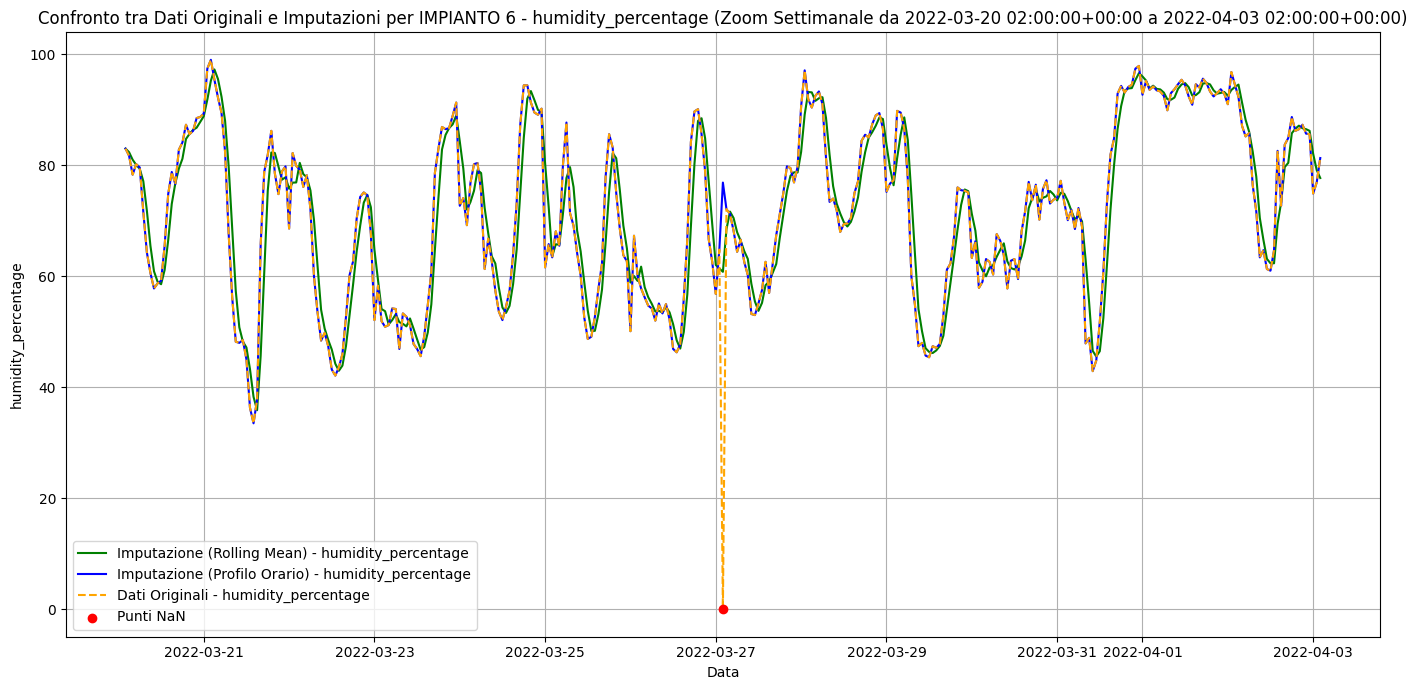

Intervallo settimanale per wind_speed_ms in IMPIANTO 6: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

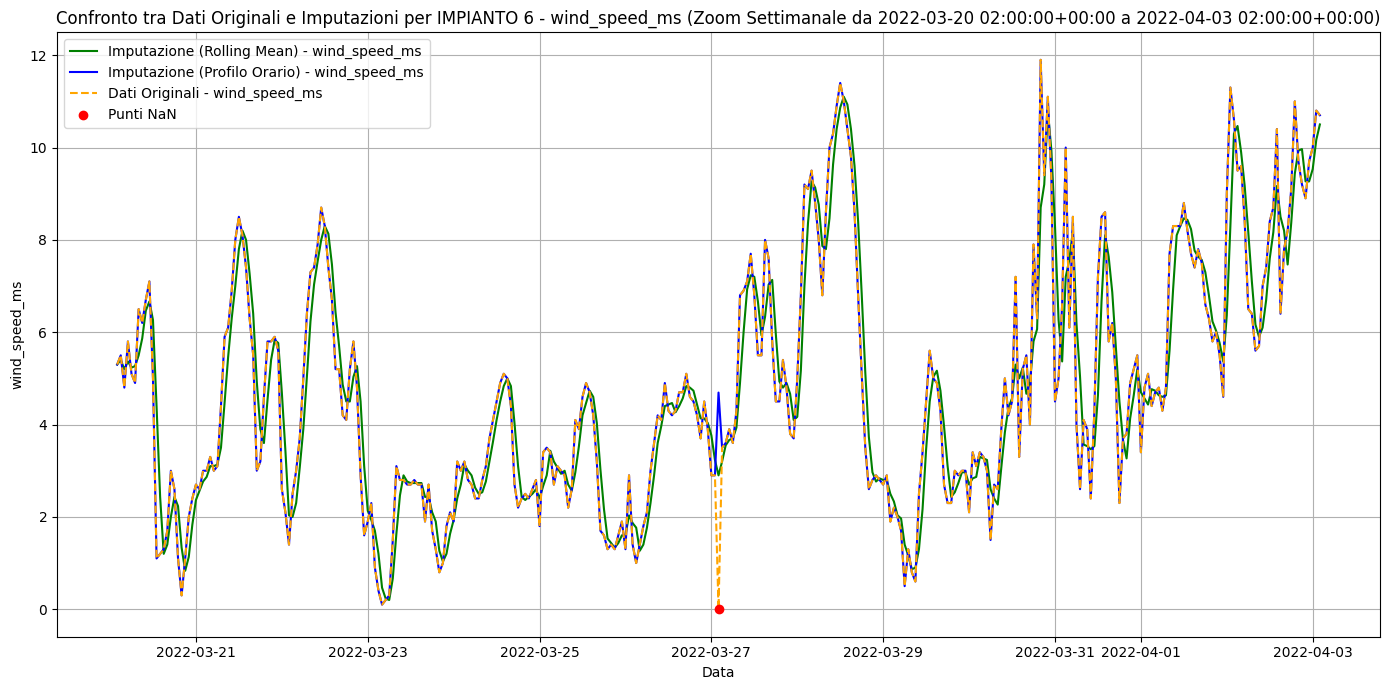

Intervallo settimanale per precipitation_mm in IMPIANTO 6: 2022-03-20 02:00:00+00:00 - 2022-04-03 02:00:00+00:00


<ipython-input-77-e39f1ea25346>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impianto_zoom['hour'] = df_impianto_zoom.index.hour
<ipython-input-77-e39f1ea25346>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original_zoom[col].fillna(0, inplace=True)
<ipython-input-77-e39f1

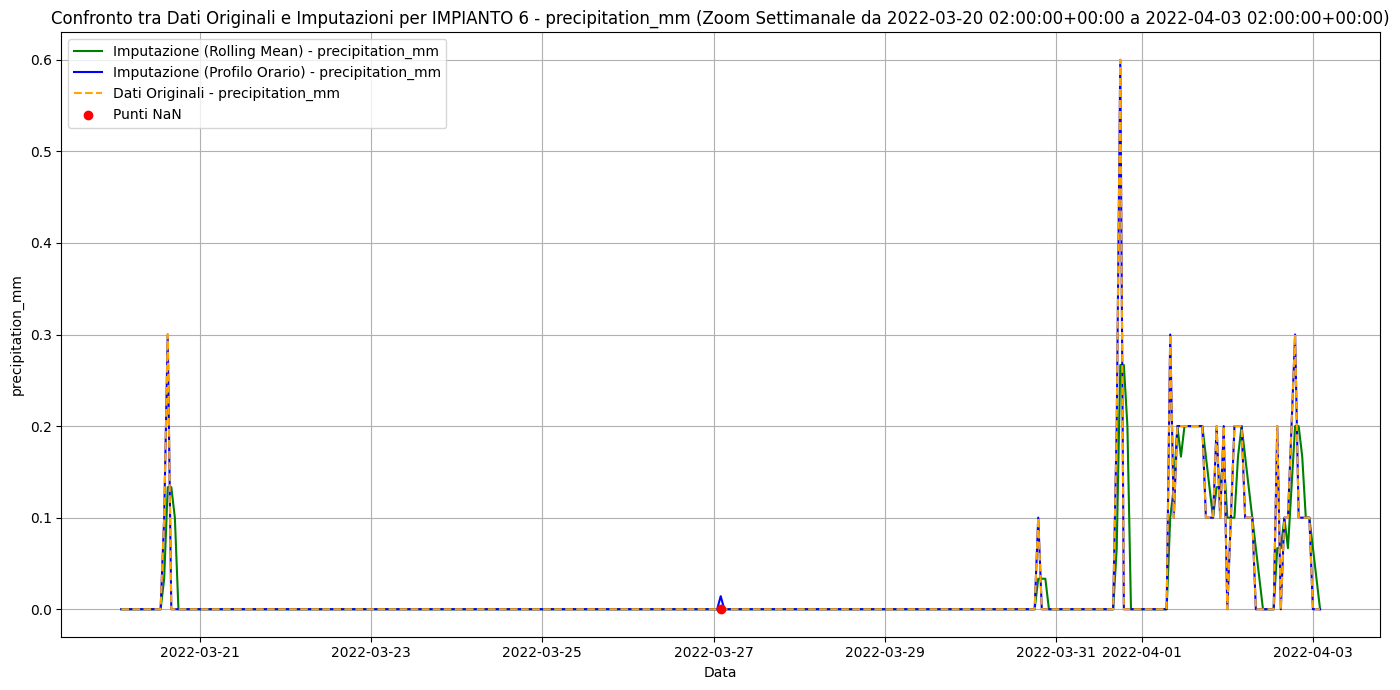

In [83]:
# Esegui l'imputazione per una specifica variabile e impianto
impianto = "IMPIANTO 6"
variabile = 'temperature_celsius'
imputazione_per_variabile(impianto, variabile)
variabile = 'humidity_percentage'
imputazione_per_variabile(impianto, variabile)
variabile = 'wind_speed_ms'
imputazione_per_variabile(impianto, variabile)
variabile = 'precipitation_mm'
imputazione_per_variabile(impianto, variabile)